<a href="https://colab.research.google.com/github/LALITH23SUNDARAM/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).**

 





*     We often came across the phrase from medic **"Incase it detected  earlier, we could have saved the lives"**. Period is crucial factor in healthcare, even a week plays a mighty role. Infection like Cancer, heart disease, STD are more probabily curable at early stage. The main motive of every healthcare organisation is **"Early diagnosis and Timely treatment"** 
*   
  Human body generates huge amount of data on each day starting from blood pressure, heart rate, glucose level, pulse rate, Body temprature, platlet counts and so many. These points  are classified with some limits. If some factor points goes beyond or behind the certain level its considered abnormolities. If we store and understand these information, both patients and doctors able to understand the situation.

*   
  Data sceince play vital role in monitoring these observations and predict the risk and able to  act timely. Healthcare leaverages the uses of data sceince and results. Reduce the costs of treatment, predict the outbreaks of epidemic, avoid preventable diseases, and improves the quality of life.




  **Framingham Heart Study** is ongoing study on heart related risks of residents of Framingham, Massachusetts. Here we are given with dataset having 3390 residents natural behaviours, Past Medical history and present observations. 


  Our objective isto classify the residents weather he/she will have heart risk in next ten years or not, with the help of gathered information.

  Its clear we have to proceed Binary classificatoin task.

  Lets explore our dataset...!











In [ ]:
# Linear algebra
import numpy as np
from numpy import math

# framework
import pandas as pd


# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filepath = '/content/drive/MyDrive/Capstone 3/Copy of data_cardiovascular_risk.csv'
cardio_df = pd.read_csv(filepath)

**Head:**

---



In [ ]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Tail.**

---



In [ ]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


**Shape:**

In [ ]:
cardio_df.shape

(3390, 17)

Renaming features for better understanding.

In [ ]:
# rename columns
cardio_df = cardio_df.rename(columns={'id':'ID','age':'Age','education':'Education','sex':'Gender','is_smoking':'Smoking','cigsPerDay':'Cig_Per_Day',
                                      'BPMeds':'BP_Medication','prevalentStroke':'Had_Stroke','prevalentHyp':'Was_Hypertensive','diabetes':'Had_Diabetes',
                                      'totChol':'Tot_chol_Level','sysBP':'Systolic_BP','diaBP':'Diastolic _BP','glucose':'Glucose_level','TenYearCHD':'Ten_Year_Risk'})

In [ ]:
cardio_df.head(3)

,ID,Age,Education,Gender,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


**Information.**

---



In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3390 non-null   int64  
 1   Age               3390 non-null   int64  
 2   Education         3303 non-null   float64
 3   Gender            3390 non-null   object 
 4   Smoking           3390 non-null   object 
 5   Cig_Per_Day       3368 non-null   float64
 6   BP_Medication     3346 non-null   float64
 7   Had_Stroke        3390 non-null   int64  
 8   Was_Hypertensive  3390 non-null   int64  
 9   Had_Diabetes      3390 non-null   int64  
 10  Tot_chol_Level    3352 non-null   float64
 11  Systolic_BP       3390 non-null   float64
 12  Diastolic _BP     3390 non-null   float64
 13  BMI               3376 non-null   float64
 14  heartRate         3389 non-null   float64
 15  Glucose_level     3086 non-null   float64
 16  Ten_Year_Risk     3390 non-null   int64  


**Varible Breakdown:**


---

  If we want to understands how much individual feature that contibuting for the prediction, we want to understands nature of the feature. if we understands its more intuitive to make hypothesis.  

**ID:**

  Distinct numericals assigned to every sample for health register and Track system.

In [ ]:
cardio_df['ID'].unique()

array([   0,    1,    2, ..., 3387, 3388, 3389])

**Education:**

Demographic information of every individuals considered as a privacy encoded in 1 to 4 scale. And some patients details are missing. 

In [ ]:
cardio_df['Education'].unique()

array([ 2.,  4.,  1.,  3., nan])

**Gender:**

  Categorical feature is patient is Male(M) or Female(F).

**Smoking:**

Categorical feature whether the patient have a habit of smoking(YES) or not(YES). Its an important factor, is patient who having habit of smoking has higher chance of Heart disease.

**Cigaretes per Day:**

  32 distinct numericals as how many cigarets thus patient smokes on a day. Since number of cigaretes per day varies from patient to patient this numericals considered as continous datapoints. 

In [ ]:
cardio_df['Cig_Per_Day'].unique(),cardio_df['Cig_Per_Day'].nunique()

(array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
        43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
        14., 16., 23., 13., 12., 70., 38.]), 32)

**Medical History:** 


**BP Medication:**
  Blood pressure is a force thats exerts blood on the wall of their blood vessels. If patient unders some Blood pressure related medication(Yes-1) or not(No-0). Considered as categorical feature.


**Had Stroke:**
  Stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. Hence its a crucial feature.
  If patient had stroke(Yes - 1) or not(No-0).


**was_Hypertensive:**
  Hypertensive relates to Blood pressure, hypertensive persons having high risk for cardiovascular disease, stroke, Heart aattack and heart failure. If patient was hypertensive(Yes - 1) or not(No - 0).


**Had_Diabetes:**
  Diabetes is a disease when blood glucose or sugar level too high. Over a time high glucose in bloods leads to Heart disease and stroke. If patient had diabetes(Yes-1) or not (No-0).


**Tol_chol_Level:**
  Total cholestrol level - Cholestrol is a waxy, fat-like substaance that created by liver from the food we ate. If there too much cholestrol in blood leads to heart disease. 
  Here, cholestrol level of every patients recorded it takes continous data ponits. Higher the cholestrol paatient have to classify under risky class.


**Systolic BP:**  
  Force that exerts blood on the wall of blood vessel when heart beats. Feaatures contains continous spectrum of data.


**Diastolic Pressure:**
  Force that exerts blood on the wall of blood vessel when heart rests.
Feaatures contains continous spectrum of data.


**BMI:**
  BMI - Body Mass Index, determined from weight and height of patients. Contains continous data points.


**Heartrate:**
  No of times that heart beats per minute. Higher the rate higher the risk of heart disease. Rates recoreded considered as continous data points.


**Glucose_level:**
  Level of glucose in patients blood, higher glucose level accumltes in blood vessels leads to heart disease. levels recorded for every patients in continous data points. 


**Missing Values:**

---



In [ ]:
cardio_df.isna().sum().sort_values(ascending=False)

Glucose_level       304
Education            87
BP_Medication        44
Tot_chol_Level       38
Cig_Per_Day          22
BMI                  14
heartRate             1
Ten_Year_Risk         0
Age                   0
Gender                0
Smoking               0
Was_Hypertensive      0
Had_Stroke            0
Had_Diabetes          0
Systolic_BP           0
Diastolic _BP         0
ID                    0
dtype: int64

Features like Glucose level, Education, Bo Medication, Cholestrol level has missing values. Lets handle missing values in later session.

In [ ]:
cardio_df.columns

Index(['ID', 'Age', 'Education', 'Gender', 'Smoking', 'Cig_Per_Day',
       'BP_Medication', 'Had_Stroke', 'Was_Hypertensive', 'Had_Diabetes',
       'Tot_chol_Level', 'Systolic_BP', 'Diastolic _BP', 'BMI', 'heartRate',
       'Glucose_level', 'Ten_Year_Risk'],
      dtype='object')

**Five Points Summary:**

---



In [ ]:
cardio_df.describe([0.01,0.1,.25, .5, .75,.99])

,ID,Age,Education,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
1%,33.890000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,96.94500,60.000000,18.252500,52.880000,55.000000,0.000000
10%,338.900000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.000000,109.00000,69.000000,21.030000,61.000000,65.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
99%,3355.110000,67.000000,4.000000,43.000000,1.000000,0.000000,1.000000,1.000000,355.490000,202.05500,119.110000,38.855000,110.000000,183.450000,1.000000


**Handling Mising Values:**

In [ ]:
pip install missingno

msno library hepls to understand how missing spreads across the data, and correlation between the features.

In [ ]:
import missingno as msno

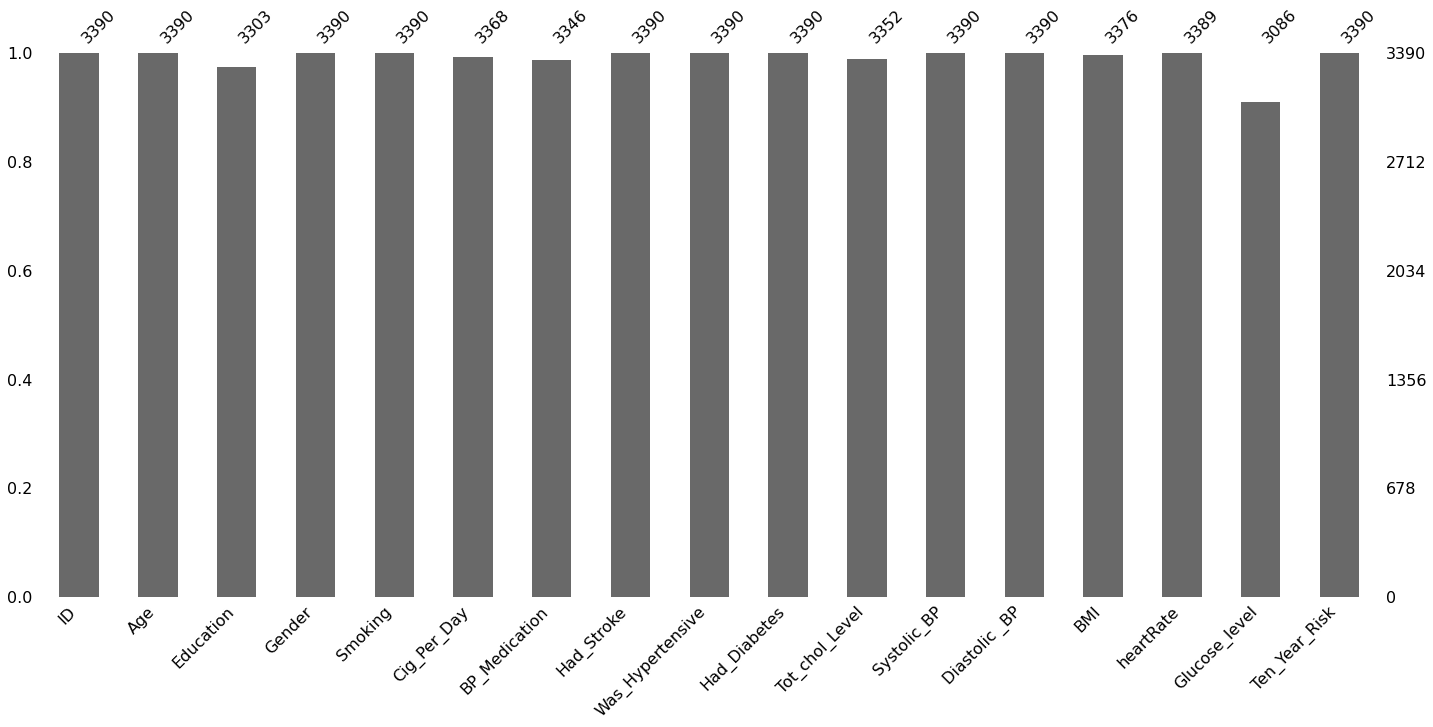

In [ ]:
# heat matrix for missing values
fig = msno.bar(cardio_df)
fig_copy = fig.get_figure()
fig_copy.savefig('msng bar.png', bbox_inches = 'tight')

Here some patients past medical history like Education, Total cholestrol level, BMI, Glucose level not recorded. This impedent to classify those patients significantly. 
 

Univariate imputation for missing values is an simplistic way, but it create bias in estimator. For that **knn meachanisam used to impute the missing values**.

***Researches suggests human character depends by the characters of people who surrounded by.***  

For that we have understood the mechanism of missingness.

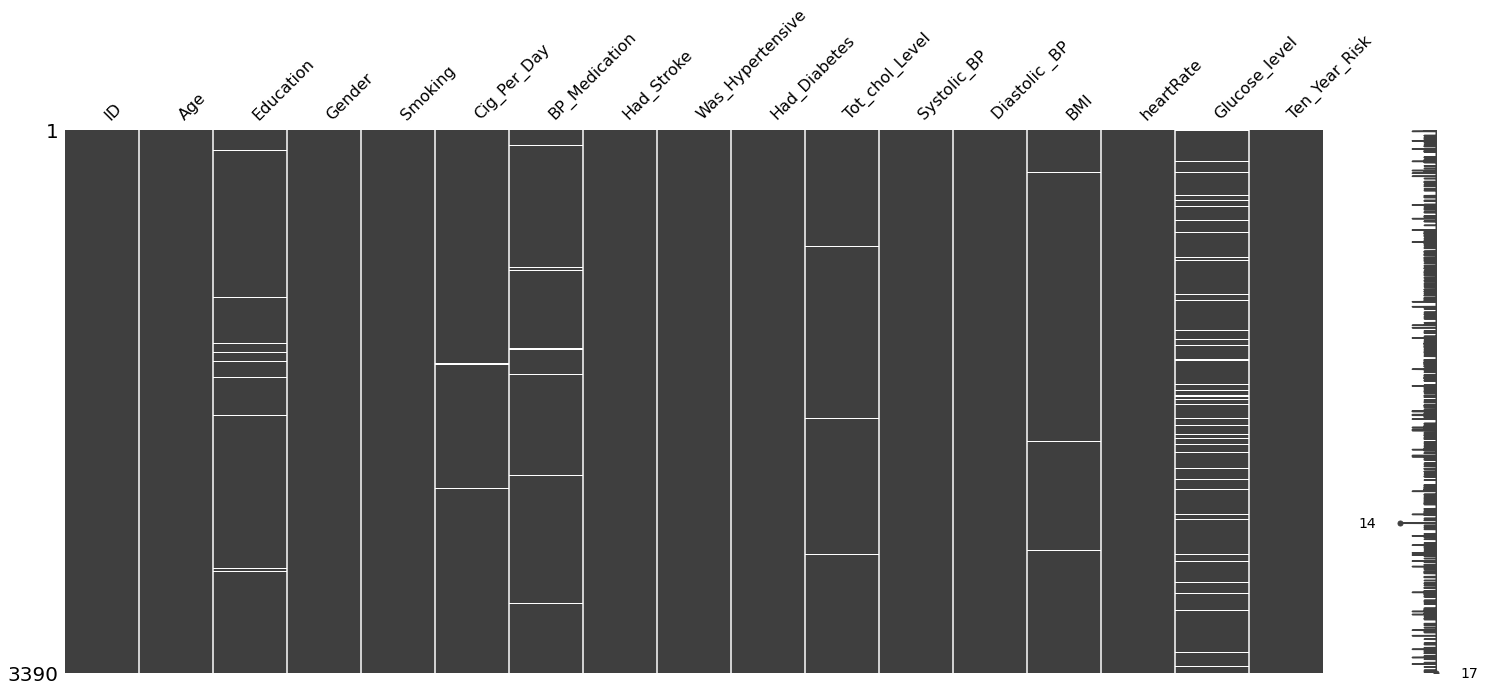

In [ ]:
fig1 = msno.matrix(cardio_df)
fig1_copy = fig1.get_figure()
fig1_copy.savefig('msng matrix.png', bbox_inches = 'tight')

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

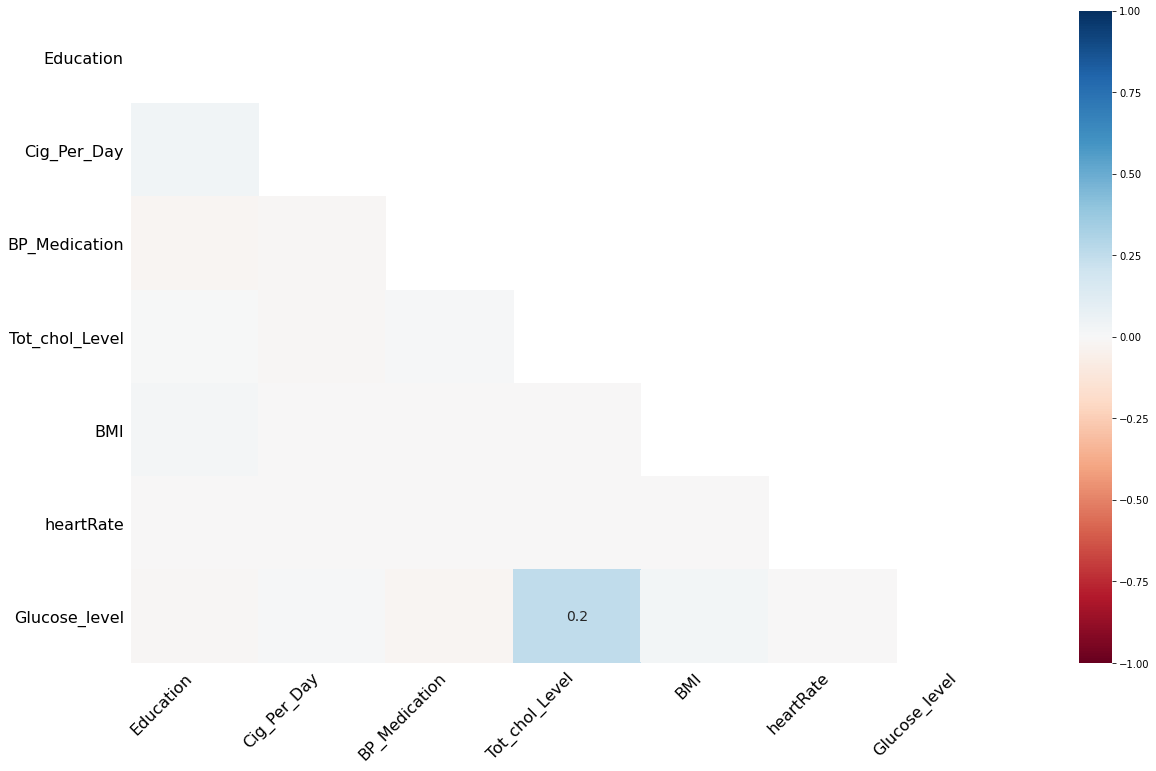

In [ ]:
# missing values correlation chart
fig2 = msno.heatmap(cardio_df)
fig2_copy = fig2.get_figure()
fig2_copy.savefig('msng heatmap.png', bbox_inches = 'tight')

The heatmap function shows that there is modearte correlations between missing values in Glucose level with Total cholestrol level..

Missing value Imputation method:
  
  
  
  

*   KNN
*   Multivariate Feature Imputation



**KNN:**

  Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
cardio_df1 = cardio_df.copy(deep=True)

**For Numerical Feature:**

In [ ]:
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform",metric='nan_euclidean')

**Parameter Explanation:**

  n_neighbor = Replacing missing values with average of three nearest neighbors with respect to that missing values.

  weights - "uniform" equal importance given to all datapoints in the dimensional space.

  metric = "nan_euclidean" Distance metric to find the nearest neighbors, lower the distance closer the observation.

**Background:**

  Here KNN algo finds the three nearest neighbors using distance metric and replace average of three neighbors inplace of  coresponding missing values.

In [ ]:
# fit transforms takes 2D array as input to calculte euclidean distance to fing nearest neighbhours

# impute missing values in feature heartRate
cardio_df1['heartRate'] = knn_imputer.fit_transform(cardio_df1[['heartRate']])

# impute missing values in feature Glucose_level
cardio_df1['Glucose_level'] = knn_imputer.fit_transform(cardio_df1[['Glucose_level']])

# impute missing values in feature Tot_chol_Level
cardio_df1['Tot_chol_Level'] = knn_imputer.fit_transform(cardio_df1[['Tot_chol_Level']])

# impute missing values in feature BMI
cardio_df1['BMI'] = knn_imputer.fit_transform(cardio_df1[['BMI']])

# impute missing values in feature Cig_Per_Day
cardio_df1['Cig_Per_Day'] = knn_imputer.fit_transform(cardio_df1[['Cig_Per_Day']])

**For Categorical Feature:**

Here just taking only the nearest neighbour as replacement to avoid some meaningless average

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
# impute missing values in Education
cardio_df1['Education'] = imp.fit_transform(cardio_df1[['Education']])

# impute missing values in feature BP_Medication
cardio_df1['BP_Medication'] = imp.fit_transform(cardio_df1[['BP_Medication']])

After Missing Value Treatment.

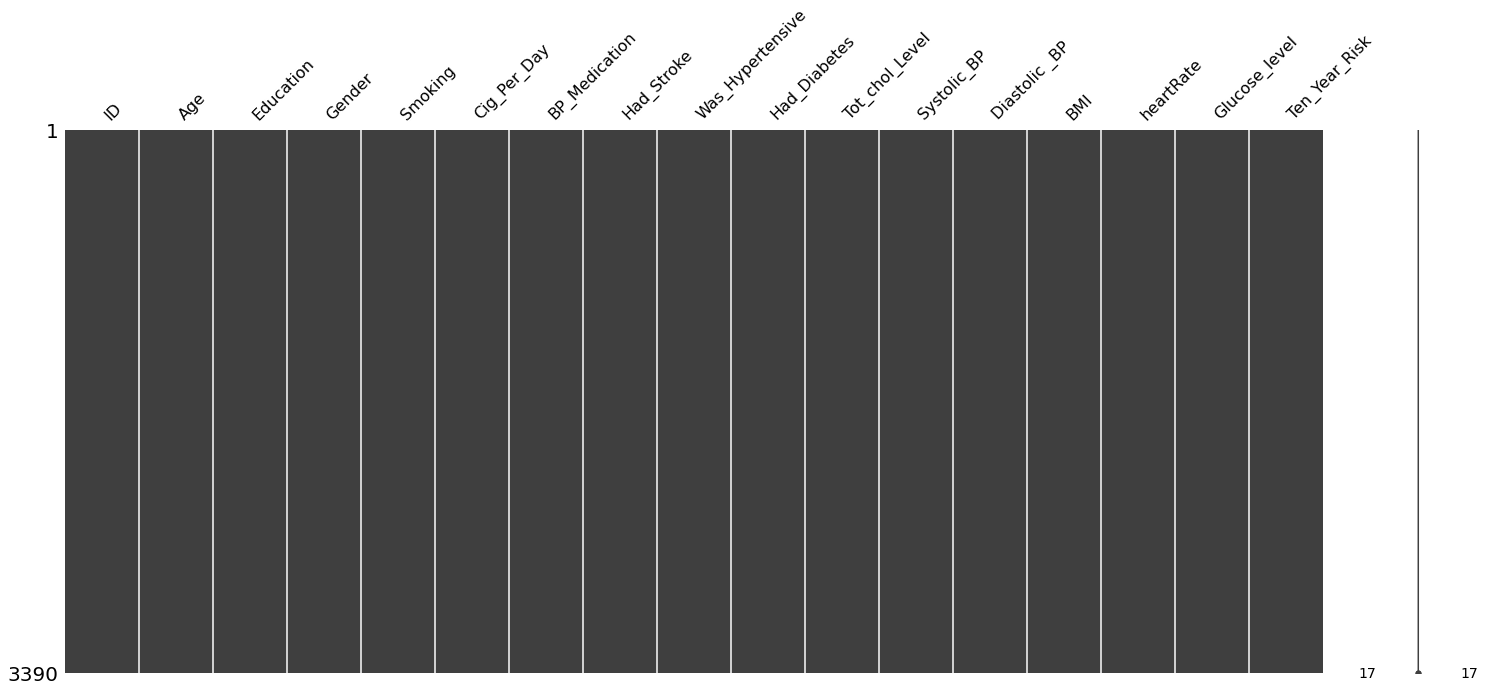

In [ ]:
fig4 = msno.matrix(cardio_df1)
fig4_copy = fig4.get_figure()
fig4_copy.savefig('msng matrix.png', bbox_inches = 'tight')

In [ ]:
cardio_df1.isna().sum()

ID                  0
Age                 0
Education           0
Gender              0
Smoking             0
Cig_Per_Day         0
BP_Medication       0
Had_Stroke          0
Was_Hypertensive    0
Had_Diabetes        0
Tot_chol_Level      0
Systolic_BP         0
Diastolic _BP       0
BMI                 0
heartRate           0
Glucose_level       0
Ten_Year_Risk       0
dtype: int64

Perfect..!

**Univarite Analysis.**

---



**Target Variable:**

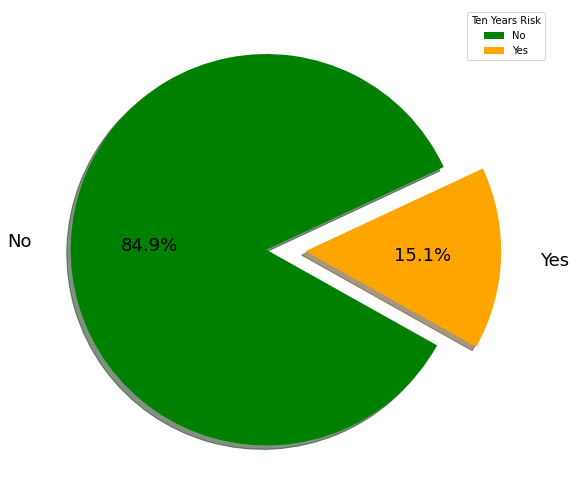

In [ ]:
# pie chart

my_labels = ['No','Yes']
my_explode = [0.2,0]
my_colors = ['green','orange']
sizes = cardio_df1['Ten_Year_Risk'].value_counts()
fig = plt.figure(1, figsize=(9,9))
plt.pie(sizes,labels = my_labels,explode = my_explode,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25,shadow = True,pctdistance = 0.6,textprops={'fontsize': 18} )
plt.legend(title = 'Ten Years Risk')
fig.savefig('Ten Years Risk.png')
plt.show()

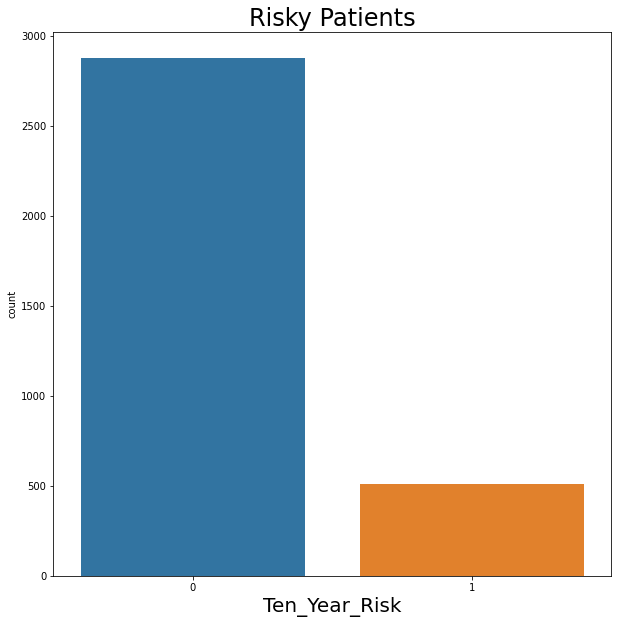

In [ ]:
# Number risky patients 


fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="Ten_Year_Risk", data=cardio_df1)
ax.set_xlabel( "Ten_Year_Risk" , size = 20 )
ax.set_title( "Risky Patients" , size = 24 )
fig.savefig('risk countplot.png')

 15% data of one class and 85% of another class, this shows imbalance between the class.

Goal of any classification algorithm wants to increase the accurcy by reducing the error. Thus, does not take into account of class proportion or Imbalaanced class.

Imagine a scenario, here our model caps all observation as 0, though having accuracy of 85%. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored.

This kind of misclassification will encountere in situation like, Crucial Disease detection, fraud detection in bank, Telecomm chrun analysis. 

Lets explain that situation in our task, if our model classifies a sample as risk, but actuall classification is Not risky. So in this sitution sample will get observation.

But incase our model classified risky patient as not risky, will be the issue.

We have balance the dataset before feeds to the model.



Lets check How individual features distributed with Target variaable.

**Age:**

---



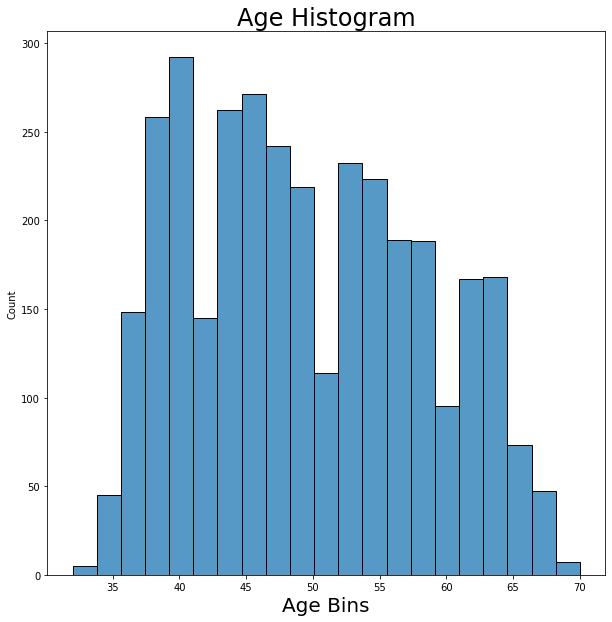

In [ ]:
# Distribution of Age
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.histplot(data=cardio_df1, x="Age")
ax.set_xlabel( "Age Bins" , size = 20 )
ax.set_title( "Age Histogram" , size = 24 )
fig.savefig('Age Histogram.png')

In [ ]:
age = cardio_df1.groupby('Age').agg({'Age':'count'})
age['percent'] = ( age['Age'] / age['Age'].sum() ) * 100
age.head()

,Age,percent
Age,,
32,1,0.029499
33,4,0.117994
34,16,0.471976
35,29,0.855457
36,75,2.212389


Study conducted between the age 32 to 70, apart from extreme ages uniformly applicants are selected from between ages.

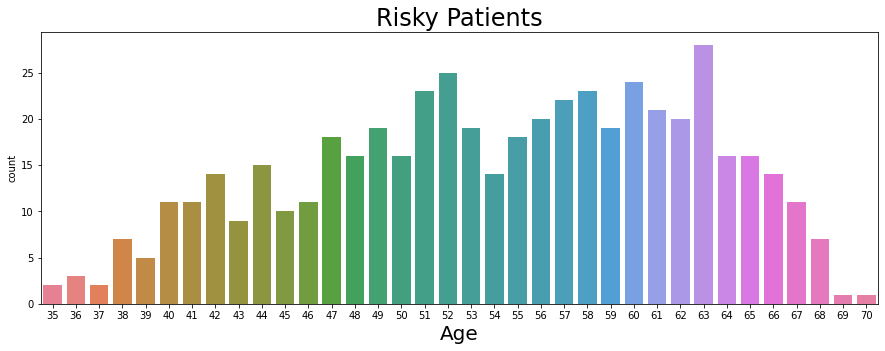

In [ ]:
# Number risky patients with respect to ge
age = cardio_df1[cardio_df1['Ten_Year_Risk']==1]

fig, ax = plt.subplots(figsize = ( 15 , 5 ))
sns.countplot(x="Age", data=age,palette='husl')
ax.set_xlabel( "Age" , size = 20 )
ax.set_title( "Risky Patients" , size = 24 )
fig.savefig('Age countplot.png')

**Gender.**

---



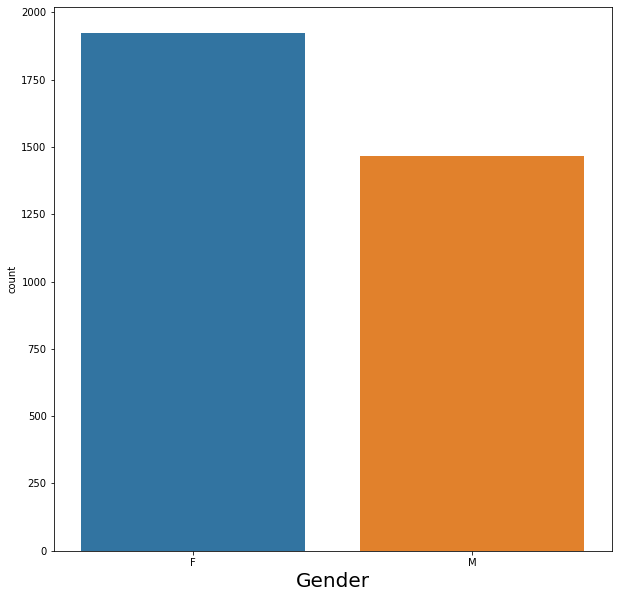

In [ ]:
# count plot
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="Gender", data=cardio_df1)
ax.set_xlabel( "Gender" , size = 20 )
fig.savefig('Gender countplot.png')

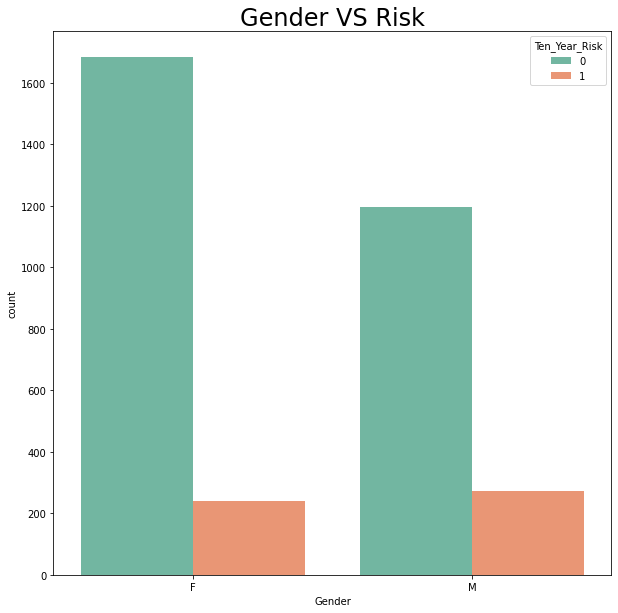

In [ ]:
# count plot with respect to response variable
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='Gender', hue='Ten_Year_Risk', data=cardio_df1, palette='Set2')
ax.set_title( "Gender VS Risk" , size = 24 )
fig.savefig('Gender VS Risk')

**Smoking:**

---



In [ ]:
cardio_df1.head()

,ID,Age,Education,Gender,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
smoking = cardio_df1.groupby('Smoking').agg({'Smoking':'count','Ten_Year_Risk':'count'})
smoking

,Smoking,Ten_Year_Risk
Smoking,,
NO,1630,1630
YES,1629,1629


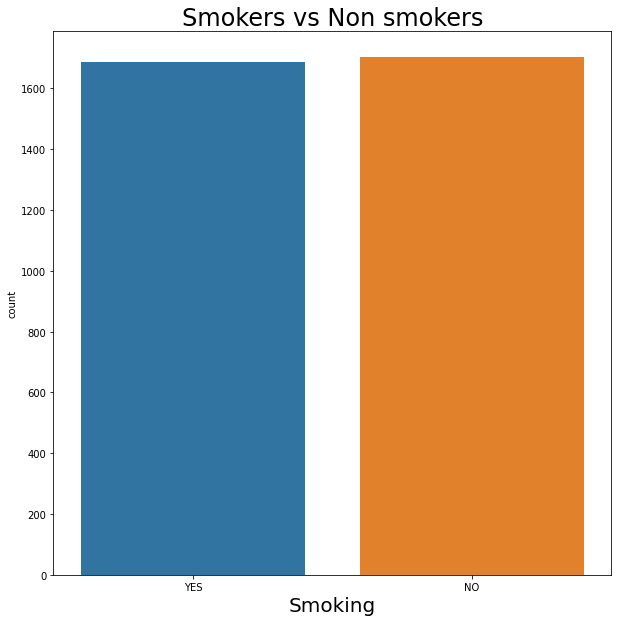

In [ ]:
# count plot
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="Smoking", data=cardio_df1)
ax.set_xlabel( "Smoking" , size = 20 )
ax.set_title( "Smokers vs Non smokers" , size = 24 )
fig.savefig('Smoke countplot.png')

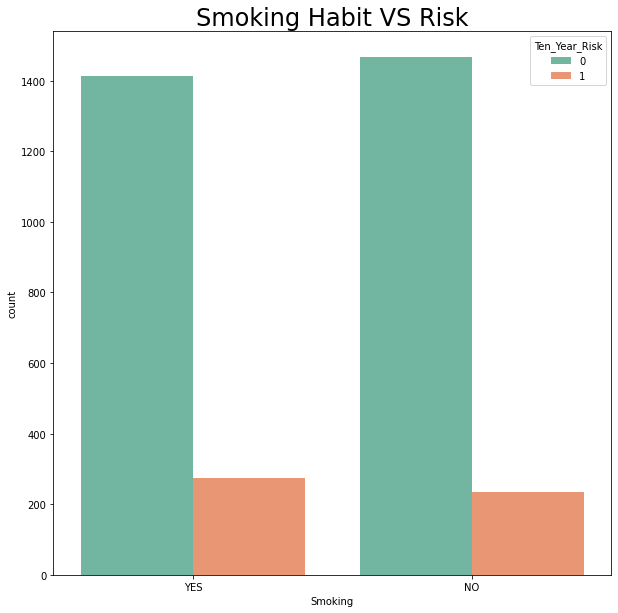

In [ ]:
# count plot with respect to response variable
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='Smoking', hue='Ten_Year_Risk', data=cardio_df1, palette='Set2')
ax.set_title( "Smoking Habit VS Risk" , size = 24 )
fig.savefig('Smokers VS Risk')

**Cigarets Per Day:**

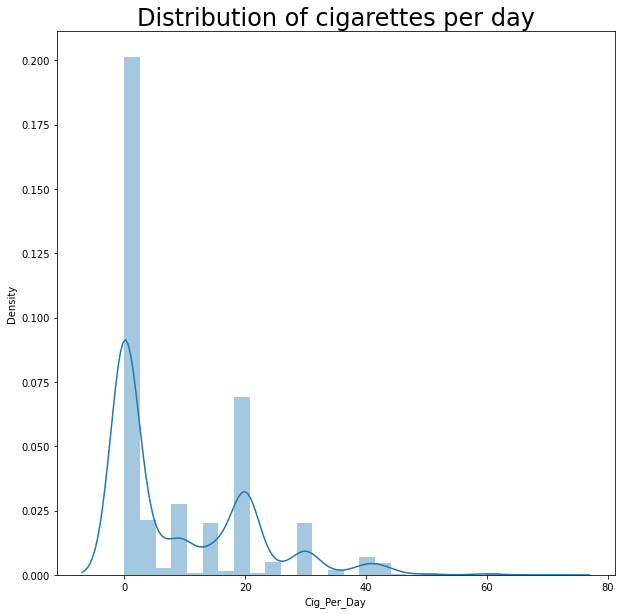

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot(cardio_df1['Cig_Per_Day'])
ax.set_title( "Distribution of cigarettes per day" , size = 24 )
fig.savefig('cig_dist')

Here some extreme values are there some persons are smoking 70 cigretes per day, here it should not considered as outliers, if done it may reduces the power of the test. Here i proceed forward with these higher values. 

Since its considered as continous points, but the distribution its look alike discrete distribution.

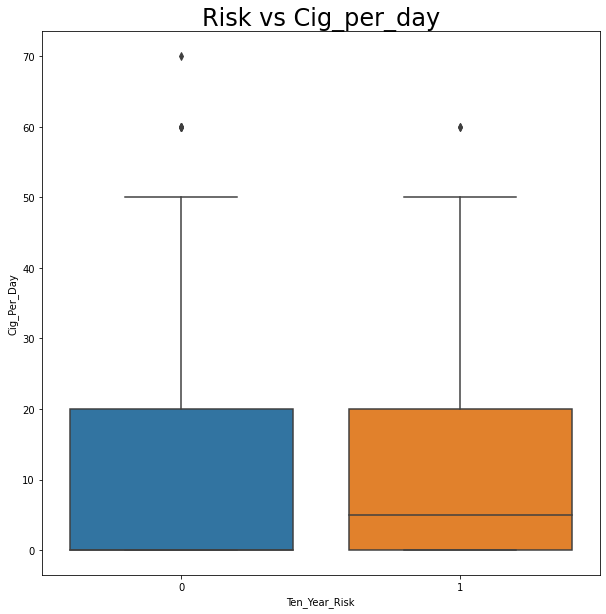

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Cig_Per_Day", data=cardio_df1)
ax.set_title( "Risk vs Cig_per_day" , size = 24 )
fig.savefig('cig_box')

In [ ]:
cig_per_day = cardio_df1[cardio_df['Ten_Year_Risk'] == 0]
cig_per_day['Cig_Per_Day'].describe([0.01,0.1,.25, .5, .75,.99])

count    2879.000000
mean        8.736874
std        11.580125
min         0.000000
1%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
99%        43.000000
max        70.000000
Name: Cig_Per_Day, dtype: float64

From above information we cant evedentially state smoking will leads to haert disease, as we seen from count plot there is no huge difference between these to comune and also our extreme smkoker who smokes 70 ci per day is not having ten year risk.

Hence, I am not encourage smoking here, Smoking is not important feature to decide whether the patient risky or not.

**Medical History:**

**BP Medication:**

---



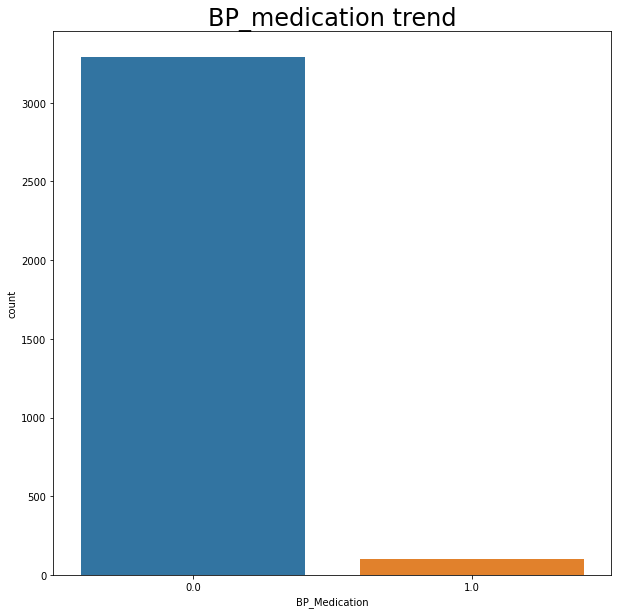

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="BP_Medication", data=cardio_df1)
ax.set_title( "BP_medication trend" , size = 24 )
fig.savefig('BP Count')

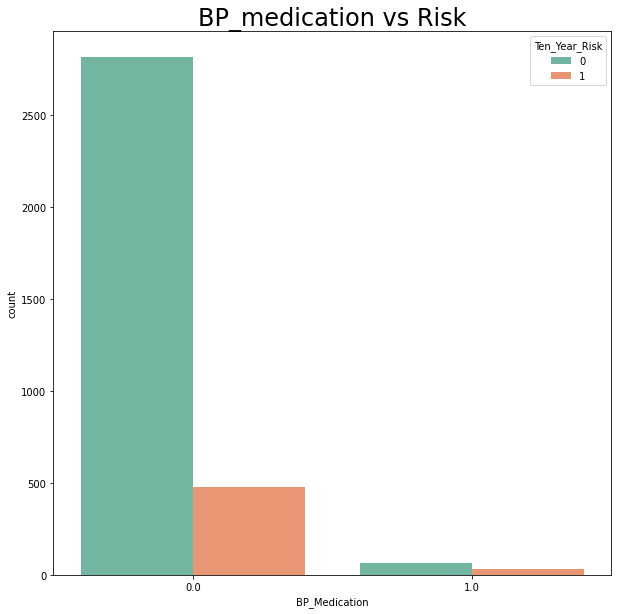

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='BP_Medication', hue='Ten_Year_Risk', data=cardio_df1, palette='Set2')
ax.set_title( "BP_medication vs Risk" , size = 24 )
fig.savefig('BP vs Risk')

In [ ]:
# had not taken BP Mediction
BP = cardio_df1[cardio_df1['BP_Medication'] == 0.0]
BP = BP.groupby('Ten_Year_Risk').agg({'BP_Medication':'count'}).rename(columns ={"BP_Medication":'not_taken_medication'})
BP['percent'] = (BP['not_taken_medication'] / BP['not_taken_medication'].sum()) * 100
BP.to_excel('out-put1.xlsx')
BP

,not_taken_medication,percent
Ten_Year_Risk,,
0,2812,85.471125
1,478,14.528875


In [ ]:
# had BP Mediction
BP = cardio_df1[cardio_df1['BP_Medication'] == 1.0]
BP = BP.groupby('Ten_Year_Risk').agg({'BP_Medication':'count'})
BP['percent'] = (BP['BP_Medication'] / BP['BP_Medication'].sum()) * 100
BP.to_excel('out-put2.xlsx')
BP

,BP_Medication,percent
Ten_Year_Risk,,
0,67,67.0
1,33,33.0


In this feature, sampling is almost biased almost 97% peoples are not taking any BP Medication in past.

Here we cant state People who taken BP Medication in past will have heart risk or not. 

**Had Stroke:**

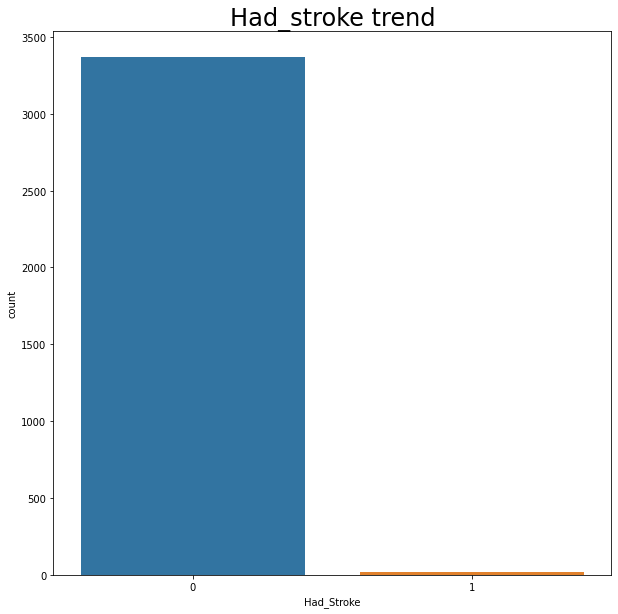

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="Had_Stroke", data=cardio_df1)
ax.set_title( "Had_stroke trend" , size = 24 )
fig.savefig('stroke Count')

Most of peoples who are living healthy lifestyle, its felt relaxed to seen this huge difference.

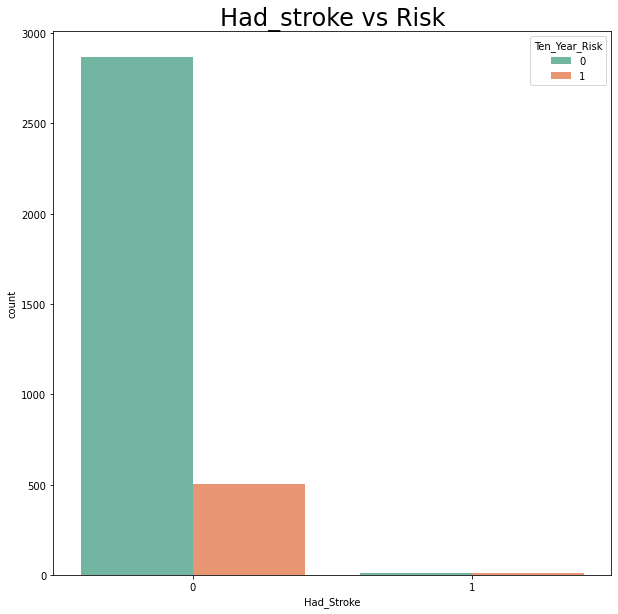

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='Had_Stroke', hue='Ten_Year_Risk', data=cardio_df1, palette='Set2')
ax.set_title( "Had_stroke vs Risk" , size = 24 )
fig.savefig('stroke1 Count')

In [ ]:
# not had stroke
stroke = cardio_df1[cardio_df1['Had_Stroke'] == 0]
stroke = stroke.groupby('Ten_Year_Risk').agg({'Had_Stroke':'count'}).rename(columns ={"Had_Stroke":'not_had_stroke'})
stroke['percent'] = (stroke['not_had_stroke'] / stroke['not_had_stroke'].sum()) * 100
stroke.to_excel('out-put3.xlsx')
stroke

,not_had_stroke,percent
Ten_Year_Risk,,
0,2867,85.124703
1,501,14.875297


In [ ]:
# had stroke
stroke = cardio_df1[cardio_df1['Had_Stroke'] == 1]
stroke = stroke.groupby('Ten_Year_Risk').agg({'Had_Stroke':'count'})
stroke['percent'] = (stroke['Had_Stroke'] / stroke['Had_Stroke'].sum()) * 100
stroke.to_excel('out-put4.xlsx')
stroke

,Had_Stroke,percent
Ten_Year_Risk,,
0,12,54.545455
1,10,45.454545


Here we registered only 22 applicants who had stroke in past, the weightage of person risky had stroke in past is greater than person who not suffer any stroke in past.

**Was Hypertensive:**

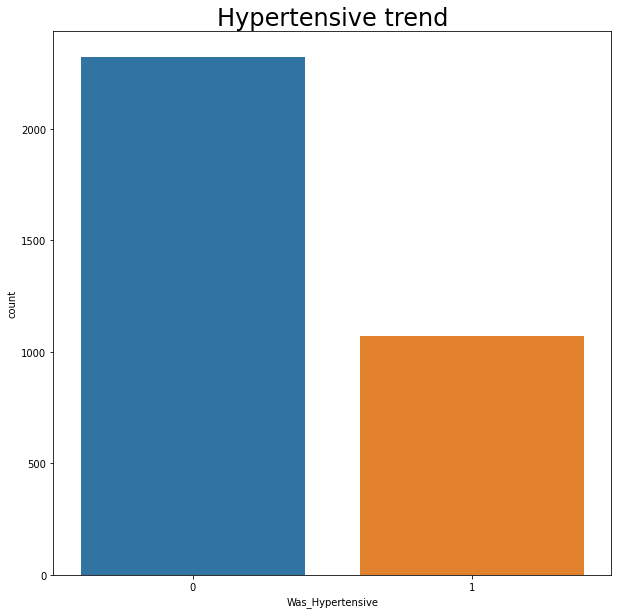

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="Was_Hypertensive", data=cardio_df1)
ax.set_title( "Hypertensive trend" , size = 24 )
fig.savefig('Hypertensive Count')

write some stories

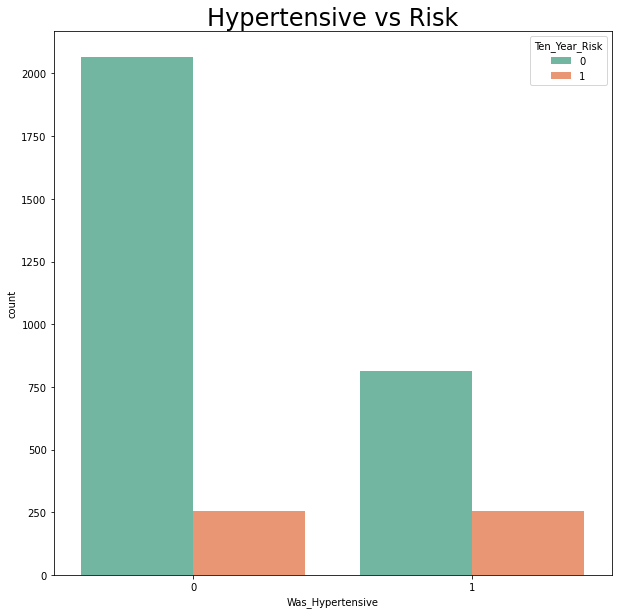

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='Was_Hypertensive', hue='Ten_Year_Risk', data=cardio_df1, palette='Set2')
ax.set_title( "Hypertensive vs Risk" , size = 24 )
fig.savefig('Hypertensive vs Risk')

In [ ]:
# weightge of heart risk who are not hypertensive
non_hyp = cardio_df[cardio_df['Was_Hypertensive']==0].groupby('Ten_Year_Risk').agg({'Was_Hypertensive':'count'}).rename(columns ={"Was_Hypertensive":'not_Hypertensive'})
non_hyp['percent'] = (non_hyp['not_Hypertensive'] / non_hyp['not_Hypertensive'].sum()) * 100
non_hyp.to_excel('out-put5_1.xlsx')
non_hyp

,not_Hypertensive,percent
Ten_Year_Risk,,
0,2065,88.970271
1,256,11.029729


In [ ]:
# weightge of heart risk who are hypertensive
hyp = cardio_df[cardio_df['Was_Hypertensive']==1].groupby('Ten_Year_Risk').agg({'Was_Hypertensive':'count'})
hyp['percent'] = (hyp['Was_Hypertensive'] / hyp['Was_Hypertensive'].sum()) * 100
hyp.to_excel('out-put6.xlsx')
hyp

,Was_Hypertensive,percent
Ten_Year_Risk,,
0,814,76.145931
1,255,23.854069


Here we can see degree of risk doubled for hypertensed persons as compared to people who are cool as cucumber.

**Had Diabetes:**

---



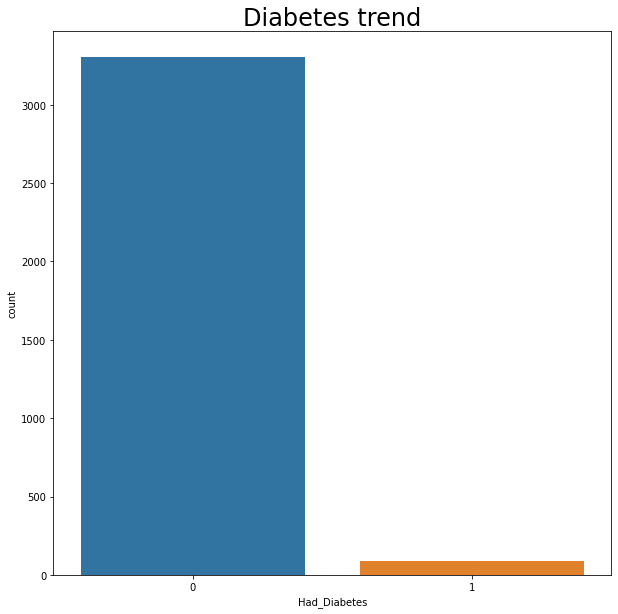

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="Had_Diabetes", data=cardio_df1)
ax.set_title( "Diabetes trend" , size = 24 )
fig.savefig('Diabetes Count')

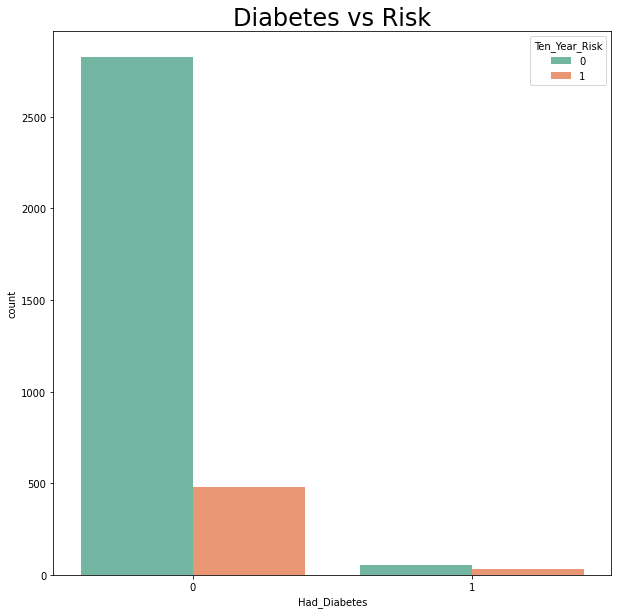

In [ ]:
# count plot with hue
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='Had_Diabetes', hue='Ten_Year_Risk', data=cardio_df1, palette='Set2')
ax.set_title( "Diabetes vs Risk" , size = 24 )
fig.savefig('Diabetes vs risk')

In [ ]:
# weightge of heart risk who are non diabetic
non_diab = cardio_df[cardio_df['Had_Diabetes']==0].groupby('Ten_Year_Risk').agg({'Had_Diabetes':'count'}).rename(columns ={"Had_Diabetes":'Not_Had_Diabetes'})
non_diab['percent'] = (non_diab['Not_Had_Diabetes'] / non_diab['Not_Had_Diabetes'].sum()) * 100
non_diab.to_excel('out-put6.xlsx')
non_diab

,Not_Had_Diabetes,percent
Ten_Year_Risk,,
0,2825,85.528308
1,478,14.471692


In [ ]:
# weightge of heart risk who diabetic
diab = cardio_df[cardio_df['Had_Diabetes']==1].groupby('Ten_Year_Risk').agg({'Had_Diabetes':'count'})
diab['percent'] = (diab['Had_Diabetes'] / diab['Had_Diabetes'].sum()) * 100
diab.to_excel('out-put7.xlsx')
diab

,Had_Diabetes,percent
Ten_Year_Risk,,
0,54,62.068966
1,33,37.931034


Rate almost triples for diabetic guys

**Total Cholestrol Level:**

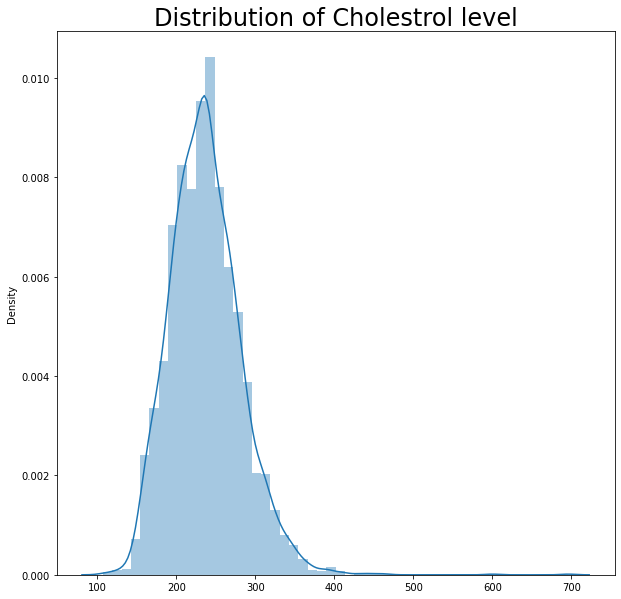

In [ ]:
# Distribution of cholestrol level
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=cardio_df1['Tot_chol_Level'])
ax.set_title( "Distribution of Cholestrol level" , size = 24 )
fig.savefig('Distribution of Cholestrol level')

In [ ]:
cardio_df1['Tot_chol_Level'].describe([0.01,0.1,.25, .5, .75,.99])

count    3390.000000
mean      237.074284
std        44.993041
min       107.000000
1%        153.000000
10%       183.000000
25%       206.000000
50%       235.000000
75%       264.000000
99%       355.110000
max       696.000000
Name: Tot_chol_Level, dtype: float64

As we can see there is huge hike from 99% to 100%, the cholestrol level get doubled.

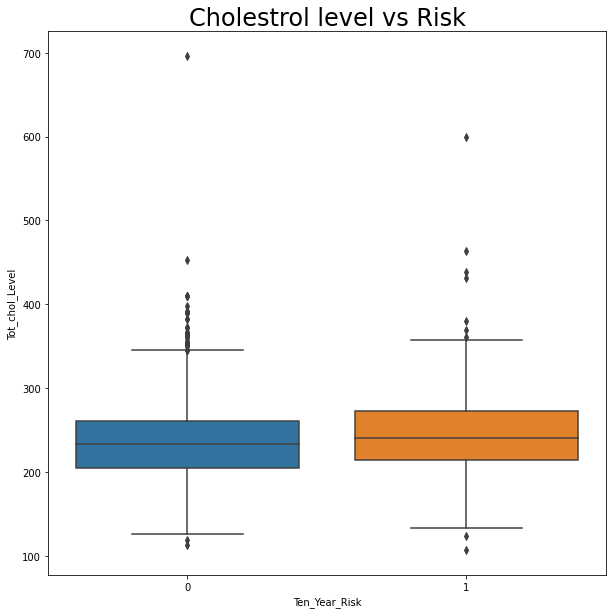

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Tot_chol_Level", data=cardio_df1)
ax.set_title( "Cholestrol level vs Risk" , size = 24 )
fig.savefig('Cholestrol level vs Risk')

Lets try first with outliers

**Systolic Blood Pressure:**

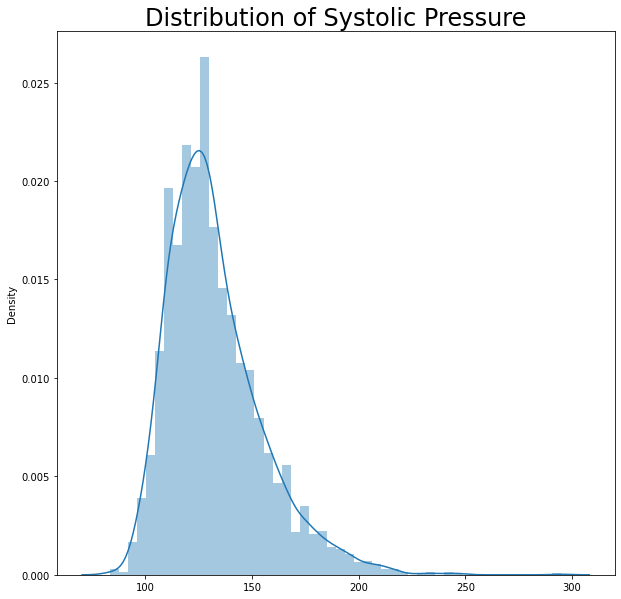

In [ ]:
# Distribution of cholestrol level
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=cardio_df1['Systolic_BP'])
ax.set_title( "Distribution of Systolic Pressure" , size = 24 )
fig.savefig('Distribution of Systolic Pressure')

In [ ]:
cardio_df1['Systolic_BP'].describe([0.01,0.1,.25, .5, .75,.99])

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
1%         96.94500
10%       109.00000
25%       117.00000
50%       128.50000
75%       144.00000
99%       202.05500
max       295.00000
Name: Systolic_BP, dtype: float64

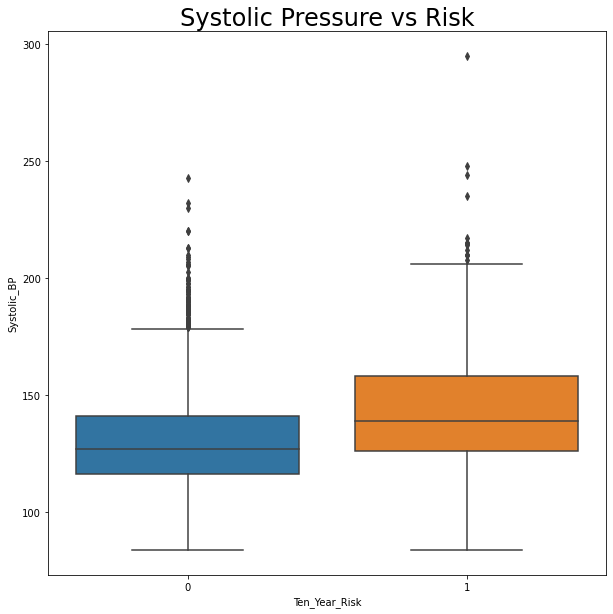

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Systolic_BP", data=cardio_df1)
ax.set_title( "Systolic Pressure vs Risk" , size = 24 )
fig.savefig('Systolic Pressure vs Risk')

50th percentile Blood pressure for risky patient has far equals to 75% of non risky patients. This factor directly influence our classificaation 

**Diastolic Pressure:**

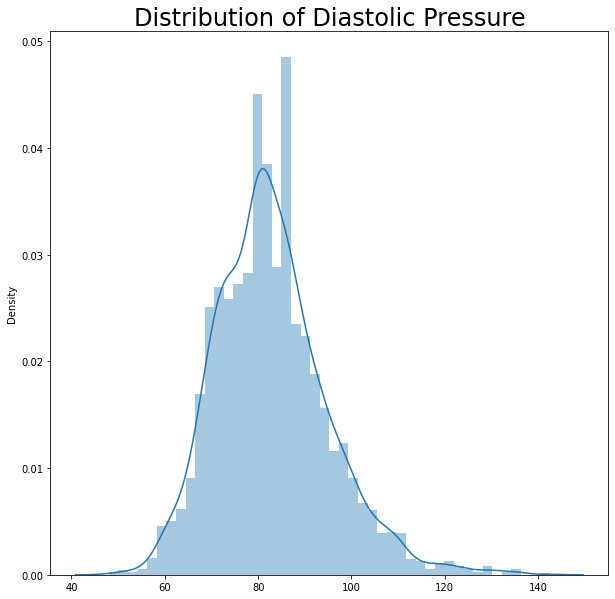

In [ ]:
# Distribution of Diastolic Pressure
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=cardio_df1['Diastolic _BP'])
ax.set_title( "Distribution of Diastolic Pressure" , size = 24 )
fig.savefig('Distribution of Diastolic Pressure')

In [ ]:
cardio_df1['Diastolic _BP'].describe([0.01,0.1,.25, .5, .75,.99])

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
1%         60.000000
10%        69.000000
25%        74.500000
50%        82.000000
75%        90.000000
99%       119.110000
max       142.500000
Name: Diastolic _BP, dtype: float64

Relatively Diastolic pressure not skewed hevily, so we can proceed further with as it is. 

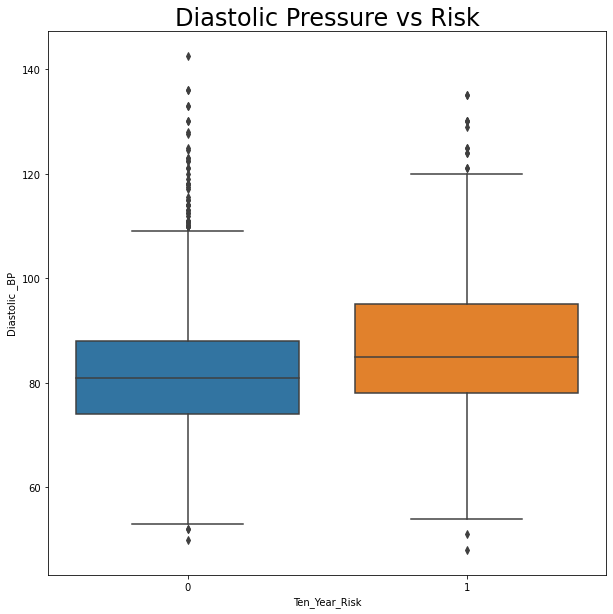

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Diastolic _BP", data=cardio_df1)
ax.set_title( "Diastolic Pressure vs Risk" , size = 24 )
fig.savefig('Diastolic Pressure vs Risk')

**BMI:**

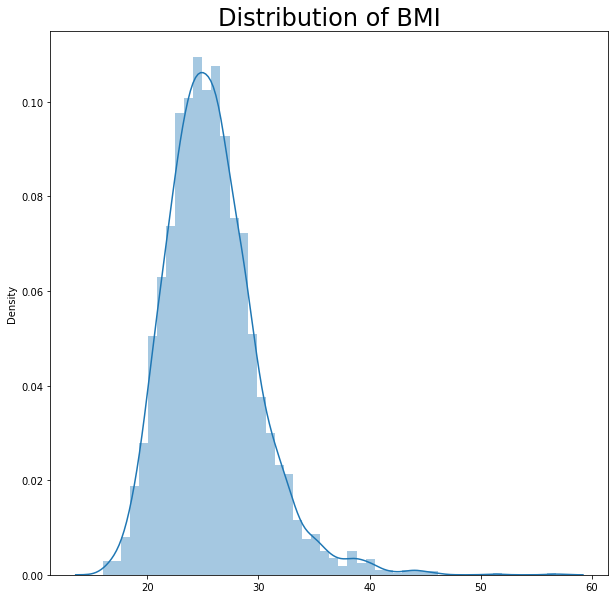

In [ ]:
# Distribution of Body Maass Index
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=cardio_df1['BMI'])
ax.set_title( "Distribution of BMI" , size = 24 )
fig.savefig('Distribution of BMI')

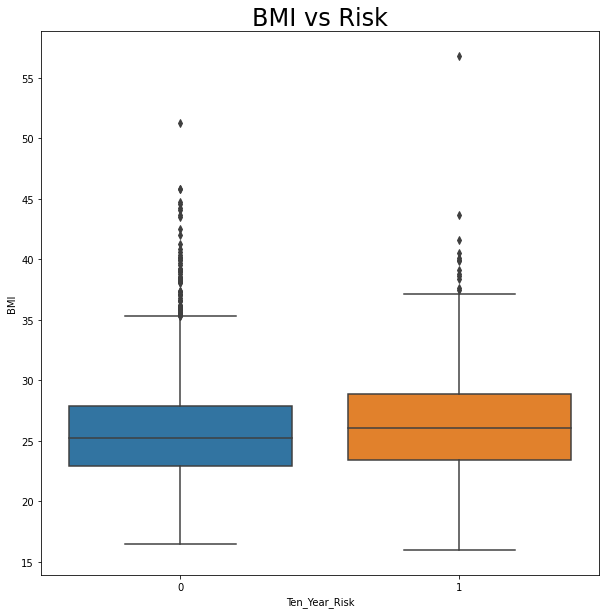

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="BMI", data=cardio_df1)
ax.set_title( "BMI vs Risk" , size = 24 )
fig.savefig('BMI vs Risk')

Higher Index peoples are more tend to risky

In [ ]:
cardio_df1.head()

,ID,Age,Education,Gender,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


**Heart Rate:**

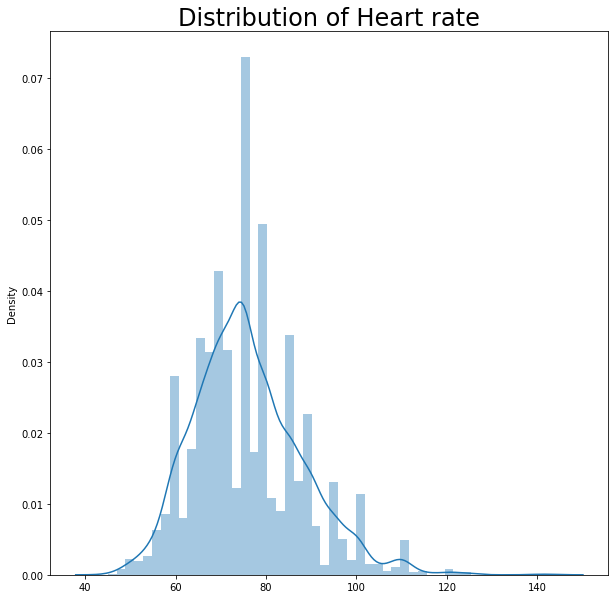

In [ ]:
# Distribution of Body Maass Index
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=cardio_df1['heartRate'])
ax.set_title( "Distribution of Heart rate" , size = 24 )
fig.savefig('Distribution of Heart rate')

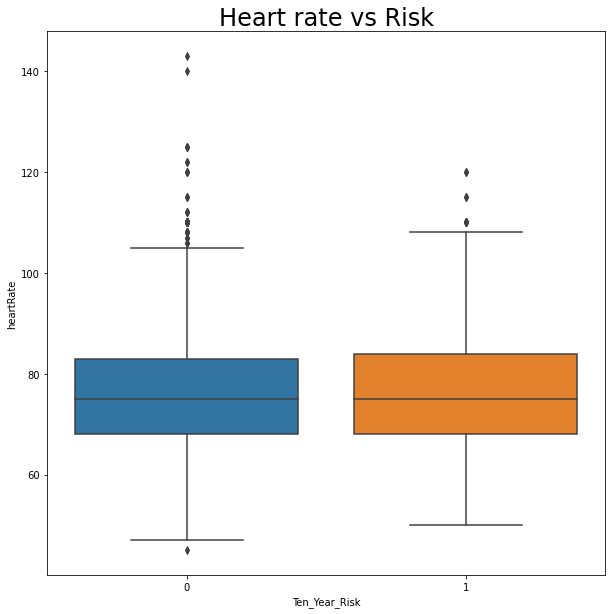

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="heartRate", data=cardio_df1)
ax.set_title( "Heart rate vs Risk" , size = 24 )
fig.savefig('Heart rate vs Risk')

**Glucose Level:**

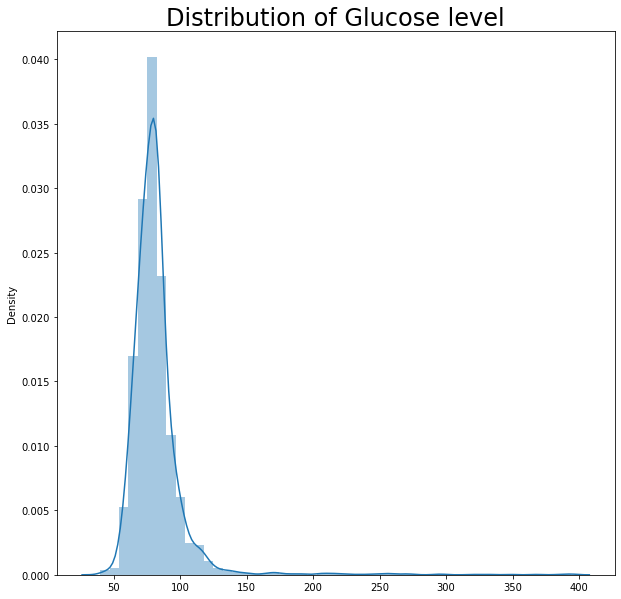

In [ ]:
# Distribution of Body Maass Index
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=cardio_df1['Glucose_level'])
ax.set_title( "Distribution of Glucose level" , size = 24 )
fig.savefig('Distribution of Glucose level')

In [ ]:
cardio_df1['Glucose_level'].describe([0.01,0.1,.25, .5, .75,.99])

count    3390.000000
mean       82.086520
std        23.131808
min        40.000000
1%         56.000000
10%        65.000000
25%        72.000000
50%        80.000000
75%        85.000000
99%       173.000000
max       394.000000
Name: Glucose_level, dtype: float64

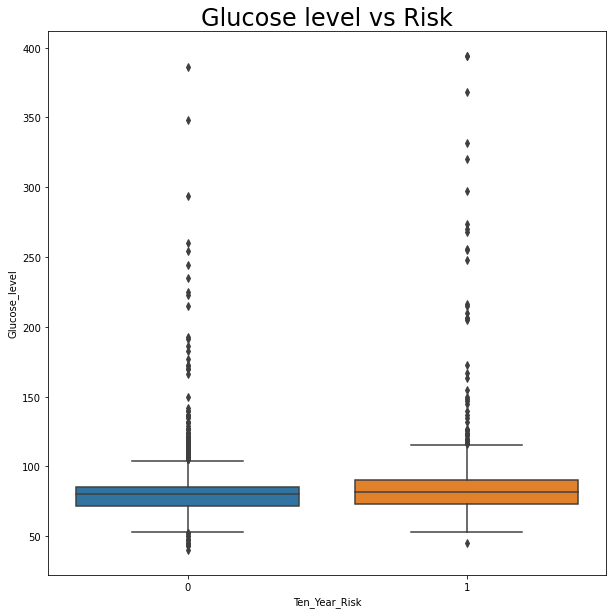

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Glucose_level", data=cardio_df1)
ax.set_title( "Glucose level vs Risk" , size = 24 )
fig.savefig('Glucose level vs Risk')

8 Observations are considered as a outliers.

**Bivariate Analysis:**

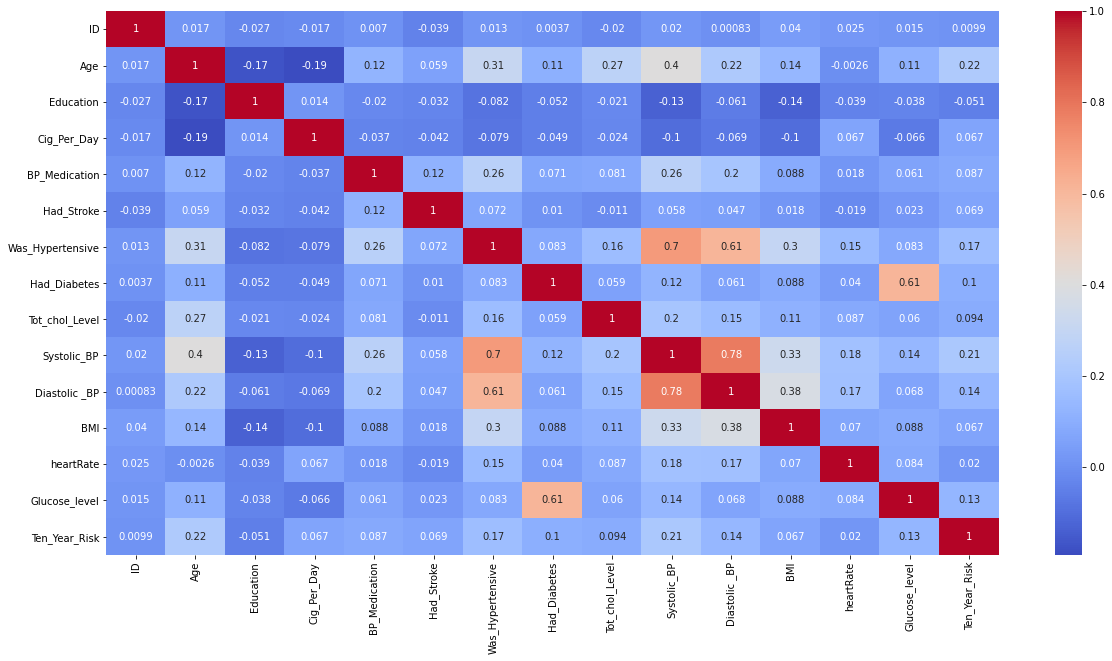

In [ ]:
 ## Correlation
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = cardio_df1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
fig.savefig('Heatmap2')

None of the variable having moderate relations to the taarget variable, by this we can pretend this is not linear classifiacation problem.

To find the approximate decision boundary across the is somewhat tricky.

Lets check the distribution between the variable

In [ ]:
cardio_df1.columns

Index(['ID', 'Age', 'Education', 'Gender', 'Smoking', 'Cig_Per_Day',
       'BP_Medication', 'Had_Stroke', 'Was_Hypertensive', 'Had_Diabetes',
       'Tot_chol_Level', 'Systolic_BP', 'Diastolic _BP', 'BMI', 'heartRate',
       'Glucose_level', 'Ten_Year_Risk'],
      dtype='object')

**Glucose Level vs Diabetes:**

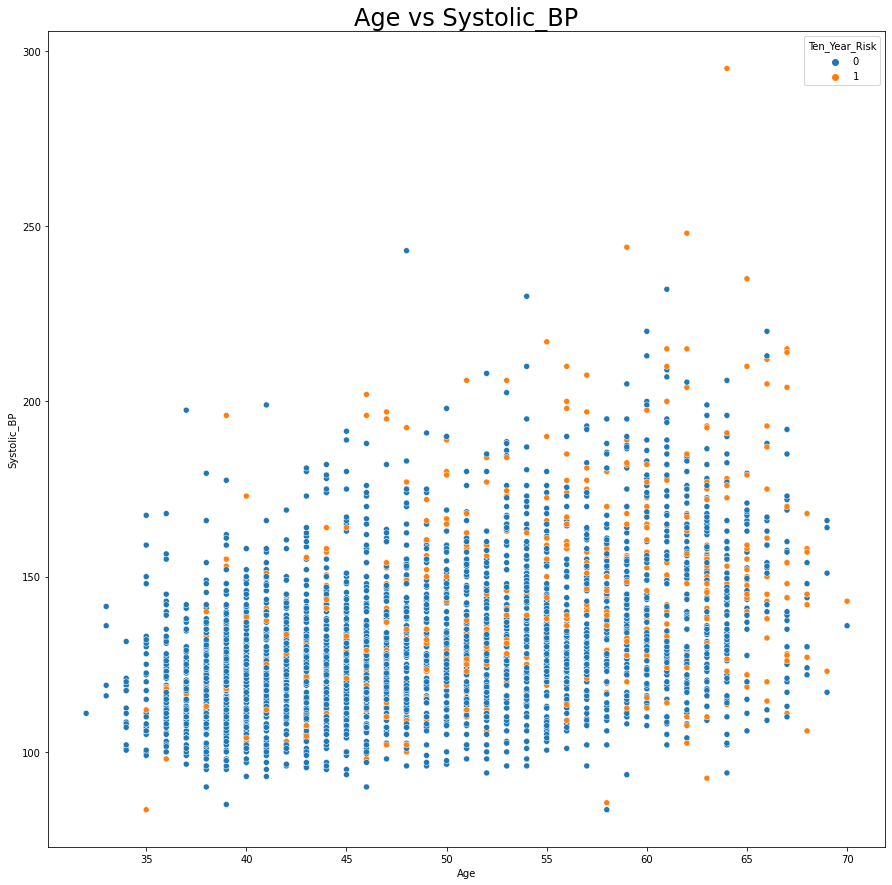

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.scatterplot(data=cardio_df1, x="Age", y="Systolic_BP", hue="Ten_Year_Risk")
ax.set_title( "Age vs Systolic_BP" , size = 24 )
fig.savefig('Age vs Systolic_BP')

**Heart Rate vs Cigaretes Per Day:**

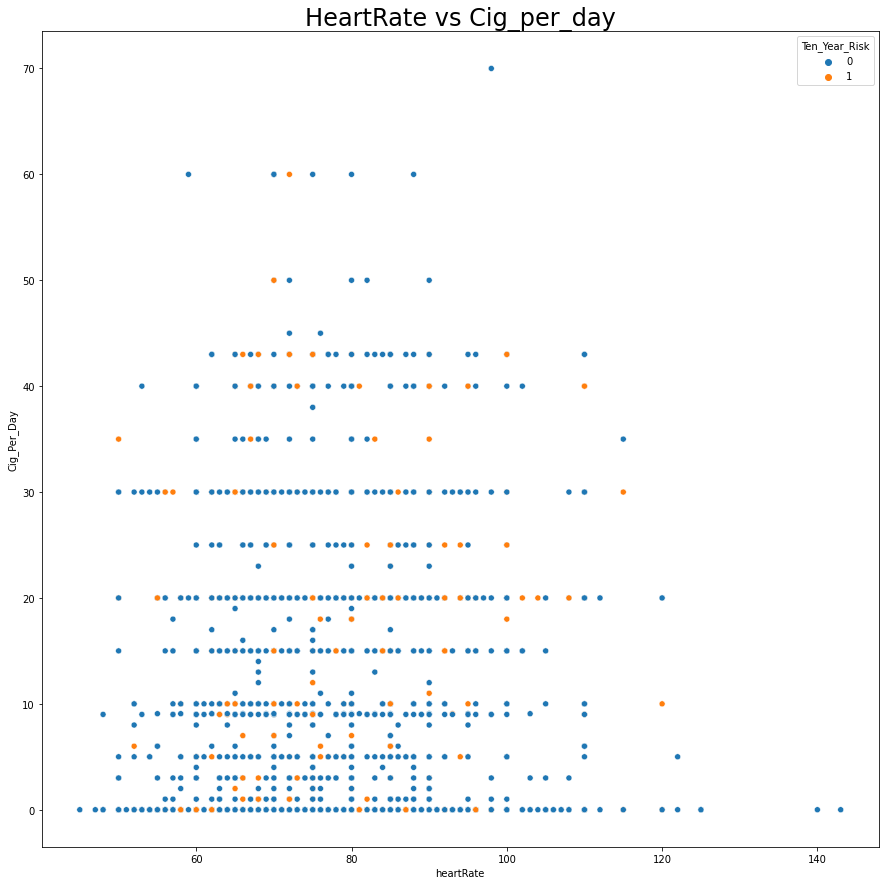

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.scatterplot(data=cardio_df1, x="heartRate", y="Cig_Per_Day", hue="Ten_Year_Risk")
ax.set_title( "HeartRate vs Cig_per_day" , size = 24 )
fig.savefig('HeartRate vs Cig_per_day')

Observations are scatter around the 2 dimension spaace, where is diificult to find the proper decision boundary that separates the two classes. 

Lets check some other variable distribution in space.

Here most of the observations are cluttered at one place.

In [ ]:
cardio_df1.head()

,ID,Age,Education,Gender,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
# create an new instance
cardio_df2 = cardio_df1.copy(deep=True)

**Labelling Categorical values:**

  

In [ ]:
### Data encoding
#label encoding
encoders_nums = {
                 "Smoking":{"YES":1,"NO":0},
                 }

In [ ]:
cardio_df2 = cardio_df2.replace(encoders_nums)
cardio_df2.head(3)

,ID,Age,Education,Gender,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
0,0,64,2.0,F,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0


**One Hot Encoding For Gender:**

  we cant lable encode by assigning Male - "1" & Female - "0". It will create bias estimation. So here I am considering equal weightage to gender.

In [ ]:
# One hot encoding
cardio_df2 = pd.get_dummies(cardio_df2, columns=[ 'Gender'], prefix=["indi"])
cardio_df2.head(3)

,ID,Age,Education,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk,indi_F,indi_M
0,0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,1,0
1,1,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,0,1
2,2,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1,0


**Handling Imbalnced Dataset:**

Steps to handle Imbalanced Dataset:

  

  

  

  

  


  

*   Undersampling
*   Oversampling

*   Undersampling : Tomek Links
*   Penalize log loss


*   K-Means Clustering

*   SMOTE Synthetic Minorirt Oversampling Technique

**Hybrid Technique:**



*   SMOTE + Tomek Links
*   SMOTE + ENN











In [ ]:
cardio_df2['Ten_Year_Risk'].value_counts()

0    2879
1     511
Name: Ten_Year_Risk, dtype: int64

ID, and demographic feature like Education not having much contribution to the target classification. Reduction Dimensionality is good way to avoid noisy data points invading.

In [ ]:
cardio_df2.columns

Index(['ID', 'Age', 'Education', 'Smoking', 'Cig_Per_Day', 'BP_Medication',
       'Had_Stroke', 'Was_Hypertensive', 'Had_Diabetes', 'Tot_chol_Level',
       'Systolic_BP', 'Diastolic _BP', 'BMI', 'heartRate', 'Glucose_level',
       'Ten_Year_Risk', 'indi_F', 'indi_M'],
      dtype='object')

Not Considering Feature "ID" for further process.

In [ ]:
cardio_df2 = cardio_df2[['Age', 'Education', 'indi_F','indi_M', 'Smoking', 'Cig_Per_Day',
       'BP_Medication', 'Had_Stroke', 'Was_Hypertensive', 'Had_Diabetes',
       'Tot_chol_Level', 'Systolic_BP', 'Diastolic _BP', 'BMI', 'heartRate',
       'Glucose_level', 'Ten_Year_Risk']]

In [ ]:
cardio_df2.head(3)

,Age,Education,indi_F,indi_M,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
0,64,2.0,1,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,1,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0


**SMOTE + Tomek Link:**

Technique constitue SMOTE followed by Tomek Link, SMOTE tries to create synthetic minority points between existing minority datapoints, after populating synthetic points, some points will overlaps over majaority, Tomek link pairs the minority with opposite class and removes it. It created the space between the class. Then its better to classify by the model.

In [ ]:
# assign values for independent variable
X = cardio_df2.iloc[:,0:-1]

# assign values for dependent variable
y = cardio_df2['Ten_Year_Risk']

In [ ]:
# import hybrit technique
from imblearn.combine import SMOTETomek
from collections import Counter

In [ ]:
sme = SMOTETomek(random_state=23)
X_res, y_res = sme.fit_resample(X, y)

In [ ]:
print(f'Original train dataset shape: {Counter(y)}')

Original train dataset shape: Counter({0: 2879, 1: 511})


In [ ]:
print(f'Resampled train dataset shape: {Counter(y_res)}\n')

Resampled train dataset shape: Counter({1: 2857, 0: 2857})



In original we have 2879 Majority class, after SMOTE + Tomek, class gets balanced and majority class got reduced 2879 to 2857, by 22 points.

Lets try SMOTE..

**Smote:**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(cardio_df2.iloc[:,0:-1], cardio_df2['Ten_Year_Risk'])

print('Original dataset shape', len(cardio_df2))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [ ]:
x_smote.shape, y_smote.shape

((5758, 16), (5758,))

Get back arrays into dataframe

In [ ]:
X_resample=pd.DataFrame(x_smote)
y_resample=pd.DataFrame(y_smote)

In [ ]:
y_resample[0].value_counts()

1    2879
0    2879
Name: 0, dtype: int64

Here we got perfect balanced dataset, 50-50%. from 511 to 2879 datapoints, 2368 Synthetic datapoints are created.  Since there not huge difference in both techniques, So here I proceed forward with SMOTE Technique.

Prerequisite done for our dataset, lets feed our datapoints to model. Kickstart with Logistic regression.

**Logistic Regression:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_smote,y_smote , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4606, 16)
(1152, 16)


**Normalisation:**

  Since logistic regression is parametric algorithm, uses gradient descent to converges to reach global minima. For the smooth convergence and equal update for every step, I am here normalizing the observations.

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from collections import Counter

In [ ]:
# check balance
Counter(y_train)

Counter({0: 2326, 1: 2280})

In [ ]:
# check balance
Counter(y_test)

Counter({0: 553, 1: 599})

**Fitting logistic regression on train data:**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=100,penalty = 'none',solver='sag')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Get the model coefficients
clf.coef_

array([[ 2.69644793, -0.12345582, -1.26283783, -0.79228943,  0.37728282,
         0.94182155,  0.36310803,  1.41265708,  0.20741008,  0.14640391,
         1.38090126,  2.56674692,  0.25360301, -0.00686249, -0.2831314 ,
         2.61876451]])

In [ ]:
feature_importance = [ 2.69644793, -0.12345582, -1.26283783, -0.79228943,  0.37728282,
         0.94182155,  0.36310803,  1.41265708,  0.20741008,  0.14640391,
         1.38090126,  2.56674692,  0.25360301, -0.00686249, -0.2831314 ,
         2.61876451]

In [ ]:
cardio_df2.columns.to_list()[:-1]

['Age',
 'Education',
 'indi_F',
 'indi_M',
 'Smoking',
 'Cig_Per_Day',
 'BP_Medication',
 'Had_Stroke',
 'Was_Hypertensive',
 'Had_Diabetes',
 'Tot_chol_Level',
 'Systolic_BP',
 'Diastolic _BP',
 'BMI',
 'heartRate',
 'Glucose_level']

**Feature Importance:**

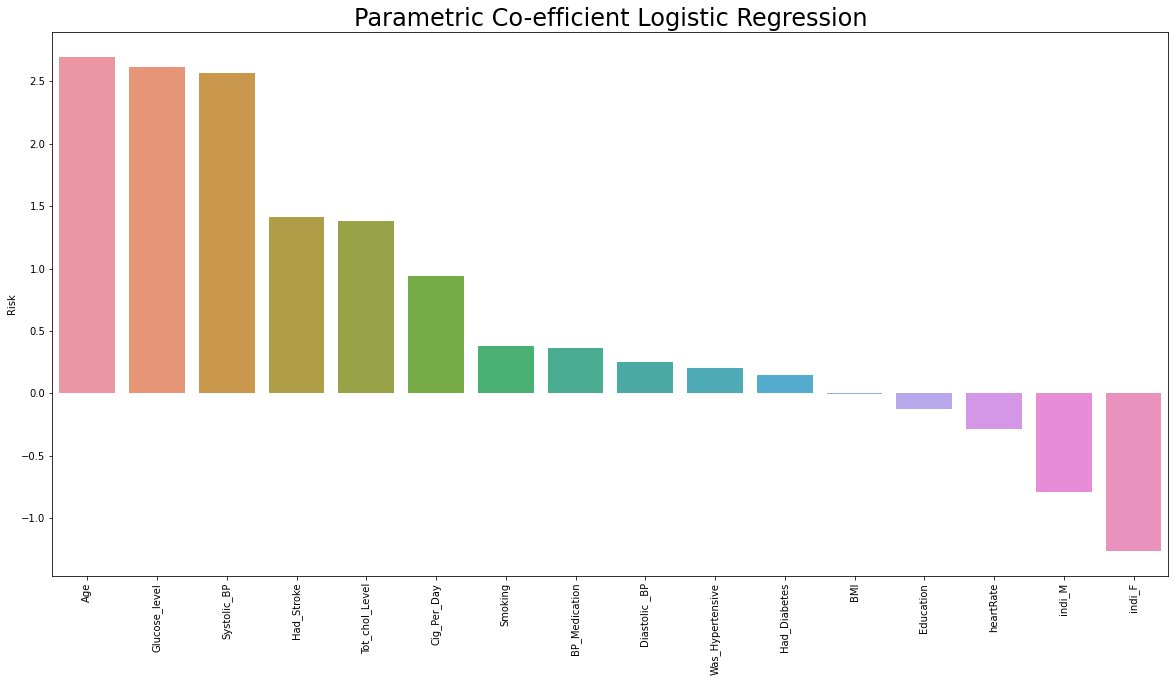

In [ ]:
# Feature Importance plot
dictionary = dict(zip(cardio_df2.columns.to_list()[:-1], feature_importance))
your_df_from_dict=pd.DataFrame.from_dict(dictionary,orient='index')

your_df_from_dict.sort_values(by=0,ascending=False,inplace=True)
your_df_from_dict.rename(columns= {0 :'Risk'},inplace=True)

fig, ax = plt.subplots(figsize = ( 20 , 10 ))
sns.barplot(x=your_df_from_dict.index, y='Risk', data=your_df_from_dict)
ax.set_title( "Parametric Co-efficient Logistic Regression" , size = 24 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('Feature Importance 1.png')

**Prediction Probability or Threshold:**

In [ ]:
# Get the predicted probabilities
train_proba = clf.predict_proba(X_train)
test_proba = clf.predict_proba(X_test)

In [ ]:
train_proba[:,1]


array([0.21248904, 0.68915566, 0.19746504, ..., 0.35380582, 0.28338428,
       0.49961152])

In [ ]:
train_preds_prob = train_proba[:,1]
test_preds_prob =  test_proba[:,1]

**Lets Predict:**

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
train_class_preds

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# import metric for classification model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve,precision_recall_curve,average_precision_score,auc
import seaborn as sns
from sklearn import metrics

[[1581  745]
 [ 737 1543]]


[Text(0, 0.5, 'Not Risk'), Text(0, 1.5, 'Risk')]

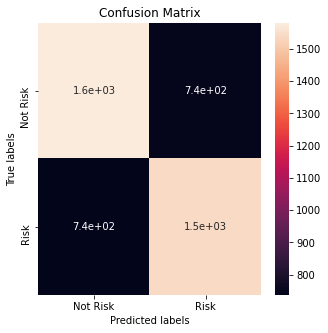

In [ ]:
# Get the confusion matrix for both train
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells


# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
# fig.savefig('Confusion matrix Logistic Train1')

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.678245766391663
The accuracy on test data is  0.6614583333333334


Our model not labeled all observation as majaority, Convertion to balanced dataset be doing good. Lets try other variants of logistic regression to increase model performance.

In [ ]:
# train
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_preds_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7397050504593384

Text(0.5, 0, 'False Positive Rate')

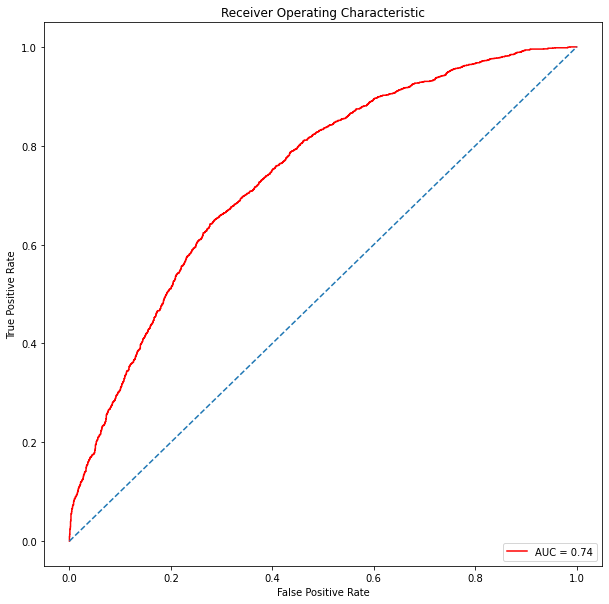

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig.savefig('Roc Logistic Train')


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# train classification report
# classification report for train
print(classification_report(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2326
           1       0.67      0.68      0.68      2280

    accuracy                           0.68      4606
   macro avg       0.68      0.68      0.68      4606
weighted avg       0.68      0.68      0.68      4606



**Test Evaluation:**

[[365 188]
 [202 397]]


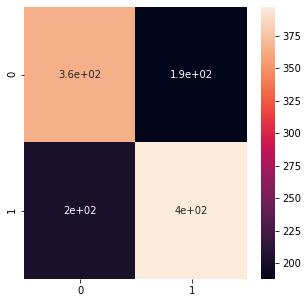

In [ ]:
# Get the confusion matrix for both test
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

fig.savefig('Confusion matrix Logistic test')

In [ ]:
# test
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_preds_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7183914118467487

In [ ]:
# classification report for test
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       553
           1       0.68      0.66      0.67       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152



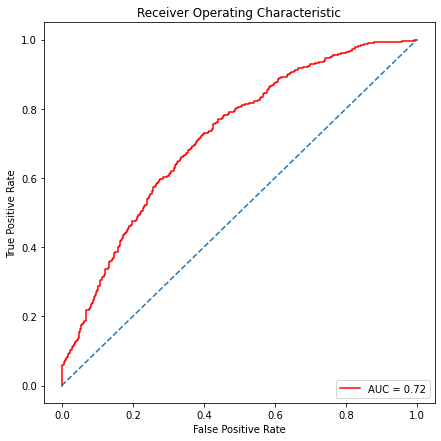

In [ ]:
# test ROC curve
fig, ax = plt.subplots(figsize = ( 7 , 7 ))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig.savefig('Roc Logistic Test')

**Precision - Recall Curve:**

   Adding a lot of patients without disease and with low test results to a study may improve the ROC curve significantly without any improvement in sensitivity or in positive predictive value of the parameter evaluated.

   The precision-recall curves are not impacted by the addition of patients without disease and with low test results. It is highly recommended to use precision-recall curves as a supplement to the routinely used ROC curves to get the full picture when evaluating and comparing tests.

**Train:**

In [ ]:
average_precision = average_precision_score(y_train, train_preds_prob)

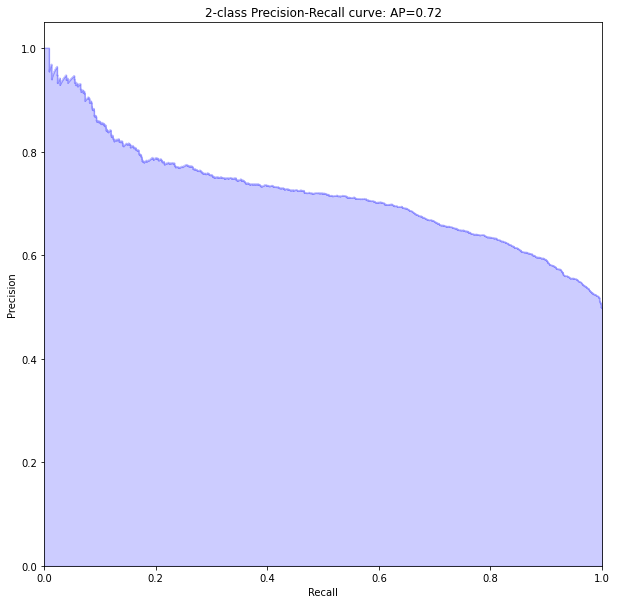

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
precision, recall, _ = precision_recall_curve(y_train, train_preds_prob)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
fig.savefig('Precision Recall Logistic Train')

**Test:**

In [ ]:
average_precision = average_precision_score(y_test, test_preds_prob)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

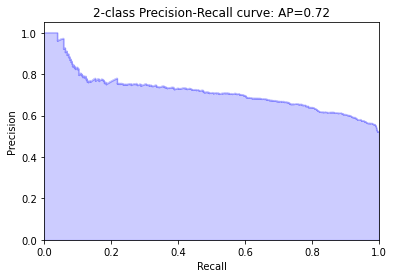

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, test_preds_prob)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

**Cross Validation:**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}

**Parametre Explanation:**

  "C" - C-Statistics, Inverse of regularization strength lower the values stronger the regularization.

  Penalty - Lasso and ridge regularization.

In [ ]:
# Creating the model:
lr = LogisticRegression() 

In [ ]:
# Creating GridSearchCV model:
lr_cv = GridSearchCV(lr, grid, cv=10)

In [ ]:
# Training the model:
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lr_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [ ]:
# Get the predicted probabilities
train_preds = lr_cv.predict_proba(X_train)
test_preds = lr_cv.predict_proba(X_test)

In [ ]:
# assign predicted positive class probability
train_preds_prob = train_preds[:,1]
test_preds_prob =  test_preds[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = lr_cv.predict(X_train)
test_class_preds = lr_cv.predict(X_test)

[[1579  747]
 [ 738 1542]]


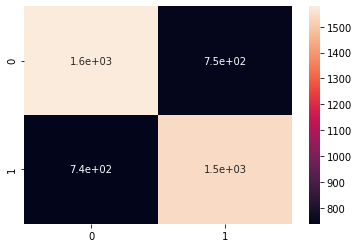

In [ ]:
# Get the confusion matrix for both train

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.677594442032132
The accuracy on test data is  0.6571180555555556


As we seen above cross validation not gives much progress to the model. Since penalty and regularisation works well with overfitted model. In our case baseline not an overfitted model. So its not recommended process for our model.

Lets try different model to get increament in metrics.

**Support Vector Machine:**

  As we all known SVM is an powerfull algo among the classifiation models. Lets try this to our study in the expecation of getting best fit. 



*   Non Probabilistic Binary Linear Classifier.
*   Efficiently Performs for non-linear classification.



**SVM Baseline model:**

  Lets run support vector classifier with Default parametres.

In [ ]:
# import svm
from sklearn.svm import SVC

In [ ]:
# create an instance
svc=SVC()

In [ ]:
# fit the model to train set with all default parametres
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Support Vector:**

In [ ]:
svc.support_vectors_

array([[0.52631579, 0.        , 1.        , ..., 0.31415279, 0.2755102 ,
        0.07909605],
       [0.81578947, 0.        , 0.        , ..., 0.18462292, 0.54081633,
        0.12146893],
       [0.42105263, 0.        , 0.        , ..., 0.1748286 , 0.56122449,
        0.05084746],
       ...,
       [0.40046779, 0.865926  , 0.        , ..., 0.27661879, 0.38764174,
        0.35421218],
       [0.48633982, 0.20254492, 1.        , ..., 0.30299696, 0.23508341,
        0.10759477],
       [0.78947368, 0.39269508, 1.        , ..., 0.46412572, 0.46770947,
        0.10904736]])

In [ ]:
# Get the predicted classes
train_class_preds = svc.predict(X_train)
test_class_preds = svc.predict(X_test)

**Train Evaluation:**

[[1973  353]
 [ 577 1703]]


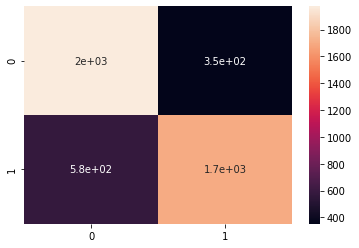

In [ ]:
# Get the confusion matrix for train 

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# train
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_class_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7975835709221463

**Test Evaluation:**

[[471  82]
 [173 426]]


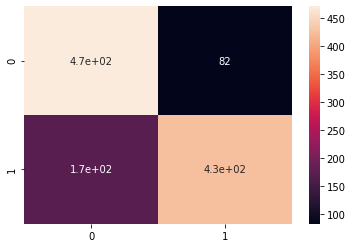

In [ ]:
# Get the confusion matrix for test

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# Roc Test
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_class_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7814516055994469

In [ ]:
# classification report for test
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       553
           1       0.84      0.71      0.77       599

    accuracy                           0.78      1152
   macro avg       0.78      0.78      0.78      1152
weighted avg       0.79      0.78      0.78      1152



As we seen confusion matrix, SVC results better compare to logistic regression with default params. Lets tune some params and run gridsearch, cross validtion to get good model with optimal parametre.

**Tunning Parametre "C":**

  Every classifier model goal is to reduce error and wants to maximize the accuracy. As same for better classification SVM come up with margin of decision boundary. 

  SVM intentionally allows some errors to creep inside the decision boundary by some threshold limit with the of margin.

  This margin come up with upper and lower bound from decision boundry.

  "C" - Perpendicular distnce between base boundary to margin. Higher the "C" lower the margin its known as Hard margin robust to outliers. Since we are not treated extreme values in our preprocessing. Hard margin will good for us.

  Soft margin - Lower the "C" value, will more on classification other than error.

  Here we're going to try with both higher and lower "C" values.

**Important Parametres:**

  Parametres to tune varies depends upon the type kernel used.

**What is kernel:**

  Kernel is just a function that maps low dimensional data to higher dimensional with less computational intensive.

**Types of kernel:**

  **Linear kernel** - one dimensional in nature. Parameter - "C"

  **Polynomial Kernel** - Beside the cost parameter C the integer parameter d has to be tuned, usually values between 1 and 10 are chosen.

  **Gaussian Radial Base Function** - Default kernel that used. Parameters "C" & "gamma".

  **Sigmoidal function** - It is interesting to note that an SVM model using a Sigmoid kernel function is equivalent to a two-layer, perceptron neural network 3. There are two adjustable parameters in this kernel, Slope – alpha and constant C – intercept.

In [ ]:
# linear kernel tunning
parameters_1 = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
              'kernel': ['linear']
              } 

# Here Margin Width"C" Parametric space reduced due to polynomial computational expensive 
# polynomial  kernel tunning
parameters_2 = {'C': [1, 5, 10, 50, 100, 500, 1000, 5000],
              'degree': [2, 3, 4, 5],
              'kernel': ['poly']
              }

# Radial kernel tunning
parameters_3 = {'C': [1, 5, 10, 50, 100, 500, 1000, 5000],

              'gamma':[0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['rbf']
              } 



**Linear Kernel:**

In [ ]:
# cross validation by parametric combination 1
cl = SVC()
grid = GridSearchCV(cl, parameters_1, cv=10)

In [ ]:
# fit the model
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000, 5000],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# prediction
grid_prediction_train = grid.predict(X_train)
grid_prediction_test = grid.predict(X_test)

**Evaluate train prediction:**

[[1517  809]
 [ 682 1598]]


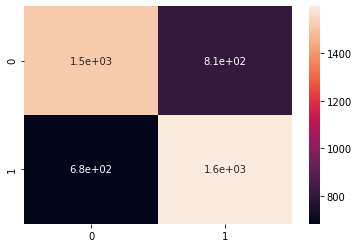

In [ ]:
# Get the confusion matrix for train

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, grid_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for train
print(classification_report(y_train, grid_prediction_train))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2326
           1       0.66      0.70      0.68      2280

    accuracy                           0.68      4606
   macro avg       0.68      0.68      0.68      4606
weighted avg       0.68      0.68      0.68      4606



In [ ]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, grid_prediction_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6765348991567481

**Test metric Evaluation:**

[[343 210]
 [182 417]]


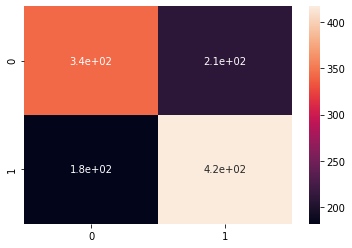

In [ ]:
# Get the confusion matrix for test

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, grid_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for test
print(classification_report(y_test, grid_prediction_test))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64       553
           1       0.67      0.70      0.68       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152



In [ ]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_prediction_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6582067158344076

In [ ]:
grid.best_params_

{'C': 5000, 'kernel': 'linear'}

Linear kernel performs worser than our Baseline SVM. Lets check with other kernel performance. And this explains its not feasible to give best linear split.

**Polynomial kernel:**

In [ ]:
# cross validation by parametric combination 1
cl = SVC()
grid = GridSearchCV(cl, parameters_2, cv=10,verbose = 3)

In [ ]:
# fit the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] C=1, degree=2, kernel=poly ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=1, degree=2, kernel=poly, score=0.725, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=1, degree=2, kernel=poly, score=0.718, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=1, degree=2, kernel=poly, score=0.716, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.720, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.733, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.761, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.693, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.752, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.746, total=   0.5s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 200.6min finished
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 200.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50, 100, 500, 1000, 5000],
                         'degree': [2, 3, 4, 5], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50, 100, 500, 1000, 5000],
                         'degree': [2, 3, 4, 5], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

It took almost three hours to run this parametric combination.

In [ ]:
# prediction
grid_prediction_train = grid.predict(X_train)
grid_prediction_test = grid.predict(X_test)

**Train metric evaluation:**

[[2230   96]
 [ 186 2094]]


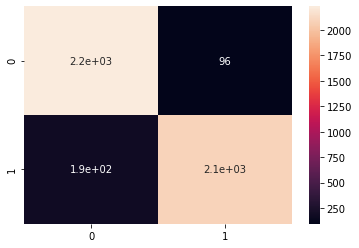

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, grid_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for train
print(classification_report(y_train, grid_prediction_train))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2326
           1       0.96      0.92      0.94      2280

    accuracy                           0.94      4606
   macro avg       0.94      0.94      0.94      4606
weighted avg       0.94      0.94      0.94      4606



In [ ]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, grid_prediction_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9385742408471739

**Test Evaluation:**

[[460  93]
 [ 98 501]]


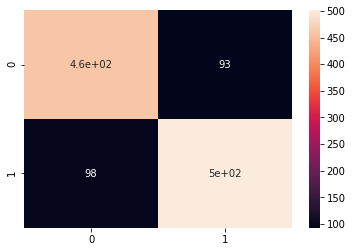

In [ ]:
# Get the confusion matrix for test

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, grid_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for test
print(classification_report(y_test, grid_prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       553
           1       0.84      0.84      0.84       599

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



In [ ]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_prediction_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8341101957149801

In [ ]:
grid.best_params_

{'C': 5000, 'degree': 5, 'kernel': 'poly'}

Polynomial kernel provides better classification as compare to baseline. Since it cant be best model inherence of time ellapsed.

 And model seems to overfits. Higher degree polynomial memorises the train data.

**Gaussian Radial Base Kernel:**

In [ ]:
# cross validation by parametric combination 3
cl = SVC()
grid = GridSearchCV(cl, parameters_3, cv=10,verbose = 3)

In [ ]:
# fit the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.657, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.655, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.633, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.633, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.664, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.627, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.628, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.622, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.661, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  8.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50, 100, 500, 1000, 5000],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# prediction
grid_prediction_train = grid.predict(X_train)
grid_prediction_test = grid.predict(X_test)

**Train Evaluation:**

[[2263   63]
 [  73 2207]]


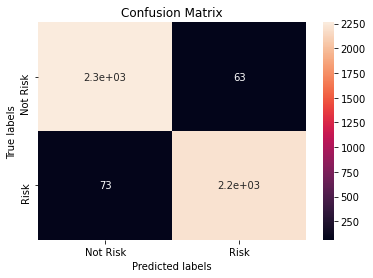

In [ ]:
# Get the confusion matrix for train

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, grid_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)


# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
fig.savefig('Confusion matrix SVM rbf')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# classification report for train
print(classification_report(y_train, grid_prediction_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2326
           1       0.97      0.97      0.97      2280

    accuracy                           0.97      4606
   macro avg       0.97      0.97      0.97      4606
weighted avg       0.97      0.97      0.97      4606



In [ ]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, grid_prediction_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9704486657313963

**Test Evaluation:**

[[455  98]
 [ 95 504]]


[Text(0, 0.5, 'Not Risk'), Text(0, 1.5, 'Risk')]

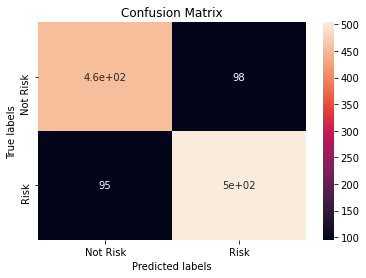

In [ ]:
# Get the confusion matrix for test

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, grid_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)


# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
# fig.savefig('Confusion matrix SVM rbf_test')

In [ ]:
# classification report for test
print(classification_report(y_test, grid_prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       553
           1       0.84      0.84      0.84       599

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



In [ ]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_prediction_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8320935736776484

In [ ]:
grid.best_params_

{'C': 5000, 'gamma': 1, 'kernel': 'rbf'}

**Model with Optimal Parametre:**

**Optimal Parametre:**

  Kernel Trick - **Gaussian Radial Base Function**  Maps the instance to higher Dimensional space for better linear separation. RBF takes exponential power negative ratios of (euclidean distance between vectors and variance). Hence this will be computationally inexpensive compare to polynomial kernel.

  **C** - defines the margin width. Optimal width = 5000. This could be Hard Margin. Hard margin focus more on error. And more robust to outliers.

  **Gamma - 1**, Gamma decides how much curvature that be in decision boundary. 

In [ ]:
# model with tunned parametre
svc_opti = SVC(C=5000.0,kernel='rbf',gamma = 1)

In [ ]:
# fit the model
svc_opti.fit(X_train, y_train)

SVC(C=5000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

**Support Vectors:**

In [ ]:
svc_opti.support_vectors_.shape

(1341, 16)

In [ ]:
# prediction
svc_opti_prediction_train = svc_opti.predict(X_train)
svc_opti_prediction_test = svc_opti.predict(X_test)

**Train Metric:**

[[2263   63]
 [  73 2207]]


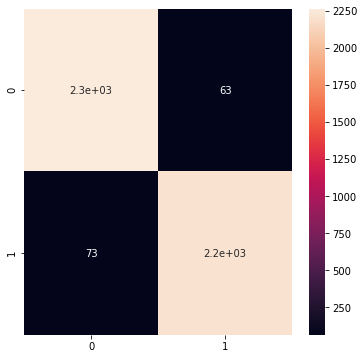

In [ ]:
# Get the confusion matrix for both train
fig, ax = plt.subplots(figsize = ( 6 , 6 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, svc_opti_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
fig.savefig("confusinn svc")

In [ ]:
# classification report for train
print(classification_report(y_train, svc_opti_prediction_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2326
           1       0.97      0.97      0.97      2280

    accuracy                           0.97      4606
   macro avg       0.97      0.97      0.97      4606
weighted avg       0.97      0.97      0.97      4606



In [ ]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, svc_opti_prediction_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9704486657313963

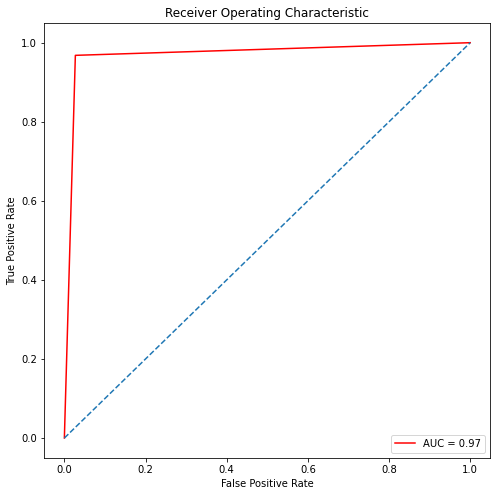

In [ ]:
# train ROC curve
fig,ax = plt.subplots(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig.savefig("auc svc")

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,svc_opti_prediction_train)
test_accuracy = accuracy_score(y_test,svc_opti_prediction_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9704732957012592
The accuracy on test data is  0.8324652777777778


**Test Evaluation metric:**

[[455  98]
 [ 95 504]]


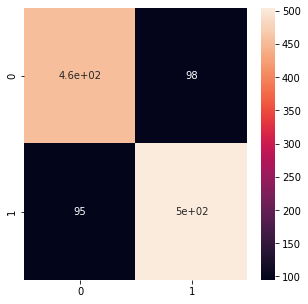

In [ ]:
# Get the confusion matrix for test
fig,ax = plt.subplots(figsize=(5,5))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, svc_opti_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
fig.savefig("svs cnfsn test3")

In [ ]:
# classification report for train
print(classification_report(y_test, svc_opti_prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       553
           1       0.84      0.84      0.84       599

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



In [ ]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, svc_opti_prediction_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8320935736776484

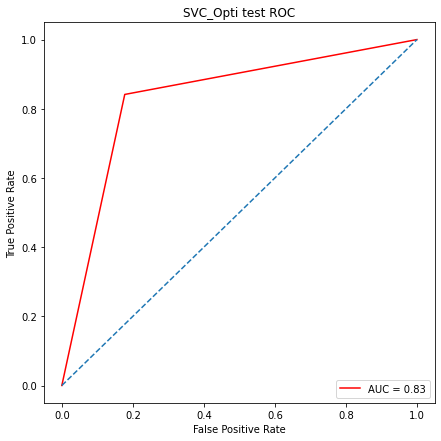

In [ ]:
# test ROC curve
fig,ax = plt.subplots(figsize=(7,7))
plt.title('SVC_Opti test ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig.savefig('ROC SVM rbf_test3')

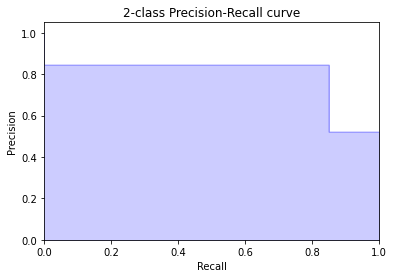

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, svc_opti_prediction_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
fig.savefig('Prec-Rec SVM rbf_test')

**Important Features In SVM:**

  Since SVM is Non-Parametric model and Not step-by-step based like Decision tree. Here we used Permutation to find thd the Feature Importance. Here feature randomly permuted and calculated the individual bootstapped model error and compares with base model error.

In [ ]:
from sklearn.inspection import permutation_importance

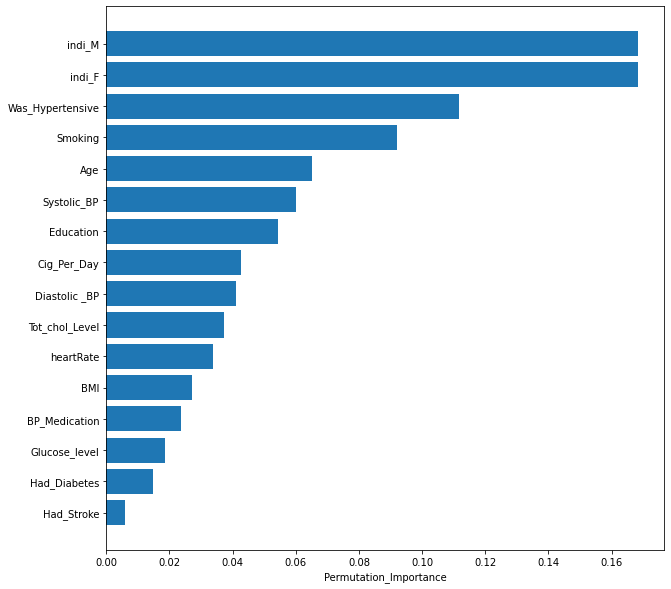

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))

perm_importance = permutation_importance(svc_opti, X_test, y_test)

feature_names = cardio_df2.columns.to_list()[:-1]

features = np.array(feature_names)

# functions retuns sorted value index
sorted_idx = perm_importance.importances_mean.argsort()

# bar plot using matlab
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation_Importance")
fig.savefig('Permutation_Importance')

**Neural network:**

Neural Network is an series of algorithm, its learning mimics as human brain. Learn from mistakes and finds the way or changes the characters to minimises the error. 

As linear regression, neural networks also parametric algorithm uses gradient descent to optimizes the parametres. But here its an itertive process inherent with forward and backward propagation called epochs. By the prescense of input layer and hiden layer neural network will provide best possible outcome as we expected.

Lets use NN to our study, with hope of getting good outcome.

In [ ]:
# Build Neural Networ
from keras.models import Sequential

from keras.layers import Dense

In [ ]:
len(cardio_df2.columns.to_list())

17

**Model Construction:**

Here I Constructed three layer neural network,Input layer with 16 neurons with input shape of (Batch_size,14), One Hidden Layer of 8 Neurons and Output Layer of Single Neuron.

**Input Layer - Activation Function ReLu** Rectified Linear Activation, To create Non-Linearity in the layer. How the weighted sum of inputs transformed from one layer to another.

**Sigmoid Function:** Sigmoid takes whaterver the value and returns value ranges between o to 1. Since our task is binary classification, output layer contains Sigmoid Activation Function.

**Optimizer** - Optimizing algorithm to update weights during every epochs, **Adam  - Adaptive Moment Estimtion**, one of the variants of gradient descent. Its adaptive learning technique updates learning rate by own inherently with initial learning rate given. And reaches global minima with less fluctuation and less time complexity.

**Binary Crossentrophy:** Penalizes more for bad prediction and low penalize for good prediction. To improve accuracy. 


In [ ]:
# sequential model
model = Sequential()

# first input layer with 16 nodes
model.add(Dense(18, input_dim=16, activation='relu'))

# Hidden layer with 8 nodes
model.add(Dense(8, activation='relu'))

# output layer with single node
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=140, batch_size=10)

Epoch 1/140
461/461 [==============================] - 1s 1ms/step - loss: 0.6818 - accuracy: 0.5775
Epoch 2/140
461/461 [==============================] - 1s 1ms/step - loss: 0.6327 - accuracy: 0.6483
Epoch 3/140
461/461 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6821
Epoch 4/140
461/461 [==============================] - 1s 1ms/step - loss: 0.5701 - accuracy: 0.7010
Epoch 5/140
461/461 [==============================] - 1s 1ms/step - loss: 0.5580 - accuracy: 0.7035
Epoch 6/140
461/461 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7257
Epoch 7/140
461/461 [==============================] - 1s 1ms/step - loss: 0.5167 - accuracy: 0.7315
Epoch 8/140
461/461 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7214
Epoch 9/140
461/461 [==============================] - 1s 1ms/step - loss: 0.5109 - accuracy: 0.7344
Epoch 10/140
461/461 [==============================] - 1s 1ms/step - loss: 0.4924 - accura

In [ ]:
# lets predict
MNP_train_pred = model.predict(X_train)
MNP_test_pred = model.predict(X_test)

In [ ]:
MNP_train_pred

array([[0.14235899],
       [0.45678365],
       [0.12934417],
       ...,
       [0.21959251],
       [0.1222063 ],
       [0.18793288]], dtype=float32)

In [ ]:
# round predictions 
MNP_train_pred = [round(x[0]) for x in MNP_train_pred]

In [ ]:
MNP_train_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

**Train Evaluation metric:**

[[2046  280]
 [ 656 1624]]


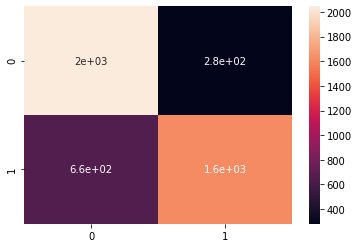

In [ ]:
# Get the confusion matrix for train

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, MNP_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [ ]:
# classification report for train
print(classification_report(y_train, MNP_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      2326
           1       0.85      0.71      0.78      2280

    accuracy                           0.80      4606
   macro avg       0.81      0.80      0.80      4606
weighted avg       0.80      0.80      0.80      4606



In [ ]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, MNP_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.795951184927064

**Test Evaluation Metric:**

In [ ]:
# round predictions 
MNP_test_pred = [round(x[0]) for x in MNP_test_pred]

[[476  77]
 [187 412]]


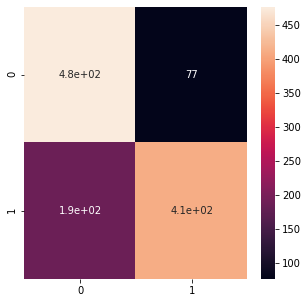

In [ ]:
# Get the confusion matrix for test
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, MNP_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
fig.savefig("NN Cnfusn")

In [ ]:
# classification report for test
print(classification_report(y_test, MNP_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       553
           1       0.84      0.69      0.76       599

    accuracy                           0.77      1152
   macro avg       0.78      0.77      0.77      1152
weighted avg       0.78      0.77      0.77      1152



In [ ]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, MNP_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7742862576868621

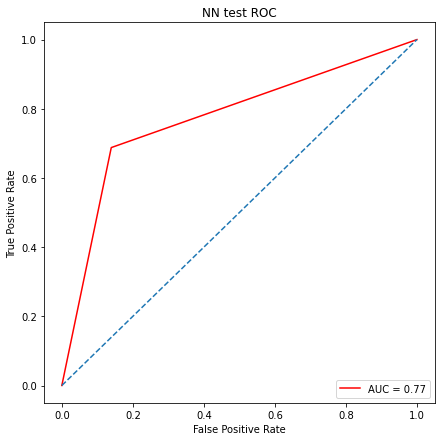

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
plt.title('NN test ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig.savefig('NN test ROC')

**Comparison:**



**ROC AUC Comparison:**

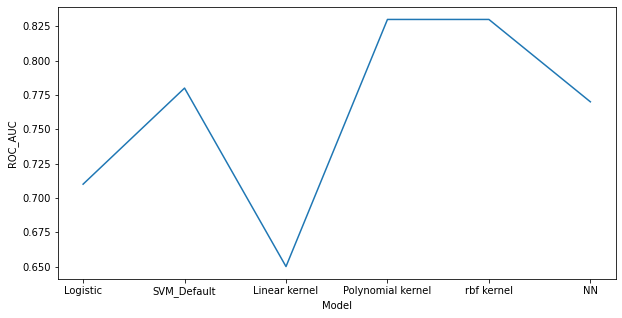

In [ ]:
# empty dataframe
comparison_df = pd.DataFrame()

# model score
Dictionary1 = [{'Model':'Logistic','ROC_AUC':0.71},{'Model':'SVM_Default','ROC_AUC':0.78},{'Model':'Linear kernel','ROC_AUC':0.65},{'Model':'Polynomial kernel',
                  'ROC_AUC':0.83},{'Model':'rbf kernel','ROC_AUC':0.83},{'Model':'NN','ROC_AUC':0.77}]

# append in dataframe
for i in Dictionary1:
  comparison_df = comparison_df.append(i,ignore_index=True)
comparison_df

# change index
comparison_df.set_index("Model",inplace=True)

# plot line plot
fig, ax = plt.subplots(figsize = ( 10 , 5 ))
sns.lineplot(data=comparison_df,x = "Model",  y="ROC_AUC")
fig.savefig("comparison")

**Recall Comparison:**

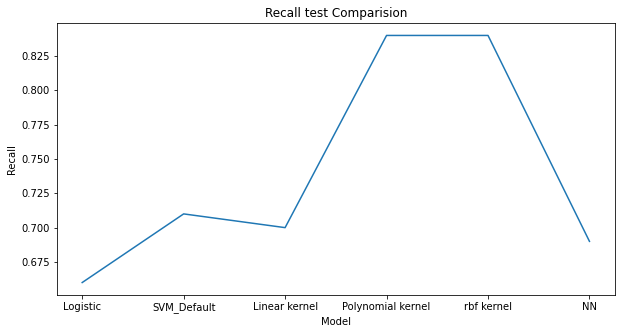

In [ ]:
# empty dataframe
comparison_df1 = pd.DataFrame()

# model score
Dictionary1 = [{'Model':'Logistic','Recall':0.66},{'Model':'SVM_Default','Recall':0.71},{'Model':'Linear kernel','Recall':0.70},{'Model':'Polynomial kernel',
                  'Recall':0.84},{'Model':'rbf kernel','Recall':0.84},{'Model':'NN','Recall':0.69}]

# append in dataframe
for i in Dictionary1:
  comparison_df1 = comparison_df1.append(i,ignore_index=True)
comparison_df1

# change index
comparison_df1.set_index("Model",inplace=True)

# plot line plot
fig, ax = plt.subplots(figsize = ( 10 , 5 ))
sns.lineplot(data=comparison_df1,x = "Model",  y="Recall")
plt.title("Recall test Comparision")
fig.savefig("comparison2")

Since by adding some more hidden layers will results better accuracy by the cost of complexity and less interpretability. But as business pov model interpretability is very much impotant, so here I stops further go.

**Summary:**

  We started our study by handling missing values using KNN Imputer, and understands how the persons habit, Medical history and current health conditions affects their Heart over the years. 

  Factors like Blood Pressure, Glucose Level, Age are create huge impact on persons heart condition. we checked the correlations between the factors. Handled the class Imbalance using SMOTE and experiment with combination of SMOTE + Tomek links. SMOTE gives good result of 50-50 class balanced data. 

  Objective is classifiction task, we started with Logistic regression with default parametres, then tunned hyperparametre using gridsearchCV in the Expectation of higher accuracy.

  Then we used Support Vector Machine with various Kernel trick with respective hyperparametre. Polynomial and rbf kernel gaves good metrics, but polynomial cost computationaly expensive with 5 degree. We chosen rbf as our optimal model.

  Then we tried neural network with single hidden layer there we get descent numbere but less as compare to rbf svm kernel. So here SVM with rbf kernel will be optimal model in our study. 

**Conclusion:**

  

Our study results



*  Habitual smokers having higher risk of heart disease.
*  Natural behaviour like Gender and age (Between 45 to 60).

*   People with hypertensive, high chance getting heart risk.
*   Blood pressure  

*   Other factors like cholestrol level, glucose level BMI had a moderate effect.





With help of applied methamatics and technology we can prevent our loved ones, families from the rare early curable disease.




**Thank you...!**